## **Necessary installs**

Those installs are only needed for API calls and some preprocessing so they are not needed if you start from uploading provided csv files.

In [3]:
#pip install sec-api

In [4]:
#from sec_api import InsiderTradingApi

In [5]:
#pip install pydash

In [6]:
#from pydash import get, flatten

In [7]:
#pip -q install jsonlines

In [8]:
#import jsonlines

## **Import libraries**

In [9]:
import pandas as pd
import numpy as np
import math
import os
import requests
import ast
from google.colab import files
import json
from datetime import datetime, timedelta
import datetime as dt
import time
import random
import yfinance as yf
import matplotlib.pyplot as plt

Big part of the code in API callings was taken from Jan Schroeders blog.

## **Using Insider Trading API from Jan Schroeder to fetch insider trading data**

In [10]:
#API_KEY = "3c6251612158e0a3d3bb1497c984af4ebce1818f684c0528e03e42cd2d9e0803"
#insiderTradingApi = InsiderTradingApi(API_KEY)

In [11]:
#def flatten_filing(filing):
#  transactions = []
#
#  # data points to be added to each transaction
#  try:
#    base_data = {
#        "periodOfReport": filing["periodOfReport"],
#        "issuerCik": filing["issuer"]["cik"],
#        "issuerTicker": filing["issuer"]["tradingSymbol"],
#        "reportingPersonName": get(filing, "reportingOwner.name", ""),
#        "reportingPersonCik": get(filing, "reportingOwner.cik", ""),
#        "relationship": get(filing, "reportingOwner.relationship", {})
#    }
#  except Exception as e:
#    print(f'{filing["id"]}, caught {type(e)}: {e}')
#    return transactions
#
#  if "derivativeTable" in filing and "transactions" in filing["derivativeTable"]:
#    # extract the data points of interest from each transaction
#    for transaction in filing["derivativeTable"]["transactions"]:
#      shares = get(transaction, "amounts.shares", 0)
#      sharePrice = get(transaction, "amounts.pricePerShare", 0)
#      sharesOwnedFollowingTransaction = get(transaction, "postTransactionAmounts.sharesOwnedFollowingTransaction", 0)
#      codingCode = get(transaction, "coding.code", "")
#      underlyingSecurity = get(transaction, "underlyingSecurity.title", "")
#
#      entry = {
#          "type": "derivative",
#          "securityTitle": transaction["securityTitle"],
#          "underlyingSecurity": underlyingSecurity,
#         "codingCode": codingCode,
#          "acquiredDisposed": transaction["amounts"]["acquiredDisposedCode"],
#          "shares": shares,
#          "sharePrice": sharePrice,
#          "total": math.ceil(shares * sharePrice),
#          "sharesOwnedFollowingTransaction": sharesOwnedFollowingTransaction
#      }
#
#      # merge base_data and entry into a new dict and append to transactions
#      transactions.append({**base_data, **entry})
#
#  if "nonDerivativeTable" in filing and "transactions" in filing["nonDerivativeTable"]:
#    # extract the data points of interest from each transaction
#    for transaction in filing["nonDerivativeTable"]["transactions"]:
#      sharePrice = get(transaction, "amounts.pricePerShare", 0)
#      sharesOwnedFollowingTransaction = get(transaction, "postTransactionAmounts.sharesOwnedFollowingTransaction", 0)
#
#      entry = {
#          "type": "nonDerivative",
#          "securityTitle": transaction["securityTitle"],
#          "codingCode": transaction["coding"]["code"],
#          "acquiredDisposed": transaction["amounts"]["acquiredDisposedCode"],
#          "shares": transaction["amounts"]["shares"],
#          "sharePrice": sharePrice,
#          "total": math.ceil(transaction["amounts"]["shares"] * sharePrice),
#          "sharesOwnedFollowingTransaction": sharesOwnedFollowingTransaction
#      }
#
#      # merge base_data and entry into a new dict and append to transactions
#      transactions.append({**base_data, **entry})
#
#  return transactions
#
#
## convert `filings` into a pandas dataframe
#def flatten_filings(filings):
#  unflattened_list = list(map(flatten_filing, filings))
#  return [item for sublist in unflattened_list for item in sublist]

In [12]:
#def download_and_save_trades_per_year(year):
#  log_file = open(f"trades_{year}.txt", "a")
#
#  has_data = True
#  start_from = 0
#  total_filings_saved = 0
#  last_count = 0
#  date_format = "%Y-%m-%d"
#  day = year + "-01-01"
#
#  while has_data:
#    insider_trades = insiderTradingApi.get_data({
#      "query": {"query_string": {"query": f"periodOfReport:{day} AND issuer.tradingSymbol:*"}},
#      "from": start_from,
#      "size": "50",
#      "sort": [{ "filedAt": { "order": "desc" } }]
#    })
#
#    if len(insider_trades["transactions"]) == 0:
#      start_from = 0
#      day_date = datetime.strptime(day, date_format) + timedelta(days=1)
#      day = day_date.strftime(date_format)
#      print(f'-- {day} --')
#
#      if day == year + "-12-31":
#        break
#
#      continue
#
#    total_filings_saved += len(insider_trades["transactions"])
#    start_from += 50
#
#    trades = flatten_filings(insider_trades["transactions"])
#
#    for trade in trades:
#      log_file.write(json.dumps(trade) + '\n')
#
#    if total_filings_saved > last_count + 500:
#      last_count = total_filings_saved
#      print(f'{total_filings_saved } saved')
#
#  log_file.close()
#  print(f'{year} done. {total_filings_saved} total filings saved')

In [13]:
# DONT RUN!

#for year in range(2016, 2025):
#  year = str(year)
#  download_and_save_trades_per_year(year)
#  files.download(f"trades_{year}.txt")

In [14]:
#def load_trades_from_file_per_year(year):
#  trades = []
#
#  with jsonlines.open(f"/content/drive/MyDrive/Colab Notebooks/DAI mission/trades_{year}.txt") as reader:
#    for trade in reader:
#      trades.append(trade)
#
#  trades_df = pd.DataFrame(trades)
#
#  trades_df["issuerTicker"] = trades_df["issuerTicker"].apply(lambda x : x.upper().replace(" ", ""))
#
#  trades_df['periodOfReport'] = pd.to_datetime(trades_df['periodOfReport'])
#
#  return trades_df

In [15]:
#def load_all_trades_from_drive():
#  all_trades = pd.DataFrame()
#
#  for year in range(2016, 2025):
#    start_time = time.time()
#    trades_per_year = load_trades_from_file_per_year(year=year)
#
#    all_trades = pd.concat([all_trades, trades_per_year])
#    end_time = time.time()
#    length = end_time - start_time
#
#    print("Did year", year)
#    print("Took", length/60, "minutes")
#
#  return all_trades

In [16]:
#all_trades = load_all_trades_from_drive()

In [17]:
# start_date = "2019-01-01"

In [18]:
#filter_all = (all_trades["shares"] != all_trades["sharePrice"]) & \
#  ( (all_trades["sharePrice"] < 6000) | (all_trades["shares"] == 1) ) & \
#  (all_trades["total"].astype(float) > 0) & \
#  (all_trades["codingCode"] != "M") & \
#  (all_trades["type"] == "nonDerivative") & \
#  (all_trades["periodOfReport"] >= start_date) & \
#  (all_trades["issuerTicker"] != "NONE") & \
#  (all_trades["issuerTicker"] != "N/A") & \
#  (all_trades["issuerTicker"] != "NA") & \
#  (~all_trades["issuerCik"].astype(str).str.contains("810893|1454510|1463208|1877939|1556801|827187")) # insider incorrectly reported share price
#
#all_trades_cleaned = all_trades[filter_all]
#all_trades_cleaned = all_trades_cleaned.drop(columns = ['issuerCik', 'reportingPersonCik', 'underlyingSecurity',
#                                                        'codingCode', 'sharesOwnedFollowingTransaction']).reset_index()#

In [19]:
#all_trades = all_trades_cleaned

## **Using MAPPING-API from Jan Schroeder to get the industry and sector info for stocks**

In [20]:
#BASE_URL = 'https://api.sec-api.io/mapping/exchange/'
#
#def get_company_details(exchange):
#    url = f"{BASE_URL}{exchange}?token={API_KEY}"
#    response = requests.get(url)
#    if response.status_code == 200:
#        return response.json()
#    else:
#        raise Exception(f"API request failed with status code {response.status_code}")
#
## Fetch details for NASDAQ and NYSE
#nasdaq_companies = get_company_details('NASDAQ')
#nyse_companies = get_company_details('NYSE')
#
## Print the details
#print("NASDAQ Companies:", nasdaq_companies)
#print("NYSE Companies:", nyse_companies)

In [21]:
## Directory to save the JSON files
#save_directory = '/content/drive/MyDrive/Colab Notebooks/DAI mission/'
#
## Save filtered results as JSON files
#nasdaq_file_path = os.path.join(save_directory, 'nasdaq.json')
#nyse_file_path = os.path.join(save_directory, 'nyse.json')
#
#with open(nasdaq_file_path, 'w') as f:
#    json.dump(nasdaq_companies, f, indent=4)
#
#with open(nyse_file_path, 'w') as f:
#    json.dump(nyse_companies, f, indent=4)

In [22]:
#def load_ticker_meta_data():
#  nyse = pd.read_json('/content/drive/MyDrive/Colab Notebooks/DAI mission/nasdaq.json')
#  nasdaq = pd.read_json('/content/drive/MyDrive/Colab Notebooks/DAI mission/nyse.json')
#
#  nyse.drop(["cusip","sic","famaSector","famaIndustry","id", "currency", "location"], axis=1, inplace=True)
#  nasdaq.drop(["cusip","sic","famaSector","famaIndustry","id", "currency", "location"], axis=1, inplace=True)
#
#  return pd.concat([nyse, nasdaq])
#
#
#ticker_meta_data = load_ticker_meta_data()
#ticker_meta_data.head(5)

#### Merge industry info on trades

In [23]:
#all_trades = all_trades.merge(ticker_meta_data, on="ticker", how="left", suffixes=(None,None))
#all_trades = all_trades[all_trades["exchange"].notna()]

## **Fetching historical stock prices from Yahoo Finance**

In [24]:
#all_trades_cleaned = all_trades
#ticker_set_cleaned = all_trades_cleaned.ticker.unique()
#print('Total number of stocks (cleaned):', all_trades_cleaned.ticker.nunique())

In [25]:
## Get daily stock price by using Yahoo Finance API
#total_stock_data = pd.DataFrame()
## ticker_set_sample = random.sample(list(ticker_set_cleaned), 10)
#i = 0
#for t in ticker_set_cleaned:
#  i = i + 1
#  if pd.isnull(t):  continue
#
#  try:
#    stock_data = yf.Ticker(t).history(start="2019-01-01",auto_adjust=False)
#    if stock_data.empty:
#        print(f"{t}: No data found, possibly delisted.")
#        continue
#    else:
#        print(f"Data for {t} retrieved successfully. Done: ", i)
#        pass
#  except Exception as e:
#      print(f"Error retrieving data for {t}: {e}")
#
#  stock_data['ticker_nm'] = t
#  stock_data2 = stock_data[['Close','Adj Close','Volume','Stock Splits','ticker_nm']]
#  total_stock_data = pd.concat([total_stock_data,stock_data2],axis=0)



In [26]:
#total_stock_data = total_stock_data.reset_index()
#total_stock_data['Date'] = total_stock_data['Date'].astype(str).str.split(' ').str[0]

In [27]:
#file_path2 = '/content/drive/MyDrive/Colab Notebooks/DAI mission/total_stock_data.csv'

In [28]:
## Save the stock price DataFrame to a CSV file
#total_stock_data.to_csv(file_path2, index=False)
#print(f"stock price DataFrame saved to {file_path2}")
#stock_data = total_stock_data

Adjust prices in insider trading dataframe using stock split info.
In the end we didnt need this since we decided not to use price reported in the filling but historical price from that day (which is already adjusted).

In [29]:
#all_trades = all_trades[all_trades['ticker'].isin(stock_data['ticker'].unique())].reset_index(drop=True)
#
#stock_split_info = stock_data[['Date', 'Adj Close', 'ticker', 'Stock Splits']]
#
#stock_split_info.loc[stock_split_info['Stock Splits'] == 0, 'Stock Splits'] = 1
#
#stock_split_info = stock_split_info.copy()
#
#stock_split_info['cum_stock_split'] = (
#    stock_split_info.iloc[::-1]
#    .groupby('ticker')['Stock Splits']
#    .transform(pd.Series.cumprod)
#    .fillna(1)
#    .iloc[::-1]
#).reset_index(drop = True)
#
#stock_split_info['Date'] = pd.to_datetime(stock_split_info['Date'])
#all_trades['Date'] = pd.to_datetime(all_trades['Date'])
#
## Sort both DataFrames by issuerTicker and their respective date columns
#all_trades = all_trades.sort_values(by=['Date'])
#stock_split_info = stock_split_info.sort_values(by=['Date'])
#
## Perform asof merge
#merged_data = pd.merge_asof(
#    all_trades,
#    stock_split_info,
#    on='Date',
#    by='ticker',
#    direction='nearest'
#)
#
#merged_data['sharePrice'] = (merged_data['sharePrice'] / merged_data['cum_stock_split']).drop(columns = ['Date',
#                                                                                                         'Adj Close',
#                                                                                                         'Stock Splits',
#                                                                                                         'cum_stock_split'])
#all_trades = merged_data

In [30]:
#file_path_trades = '/content/drive/MyDrive/Colab Notebooks/DAI mission/all_trades_with_info.csv'
#
## Save the stock price DataFrame to a CSV file
#all_trades.to_csv(file_path_trades, index=False)
#print(f"stock price DataFrame saved to {file_path_trades}")

## **LOAD DATA HERE**

### How to load data

Load *total_stock_data.csv* and *all_trades_info.csv* into dataframes *stock_data* and *all_trades*

In [104]:
# from google.colab import drive
# drive.mount('/content/drive')

In [32]:
# Set your file path for stocks total_stock_data.csv or load it some other way
# file_path_stocks = '/content/drive/MyDrive/Colab Notebooks/DAI mission/total_stock_data.csv'
stock_data = pd.read_csv(file_path_stocks)

# Set your file path for trades all_trades_with_info.csv or load it some other way
# file_path_trades = '/content/drive/MyDrive/Colab Notebooks/DAI mission/all_trades_with_info.csv'
all_trades = pd.read_csv(file_path_trades)

## **Lets first explore the insider trades dataset a bit (EDA)**

In [33]:
all_trades.Date = pd.to_datetime(all_trades.Date)

stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data = stock_data.rename(columns = {'ticker_nm' : 'ticker'})

In [34]:
all_trades.columns

Index(['Date', 'ticker', 'reportingPersonName', 'relationship', 'type',
       'securityTitle', 'acquiredDisposed', 'shares', 'sharePrice', 'total',
       'Adj Close', 'Stock Splits', 'cum_stock_split', 'name', 'cik',
       'exchange', 'isDelisted', 'category', 'sector', 'industry', 'sicSector',
       'sicIndustry'],
      dtype='object')

In [35]:
all_trades.head()

,Date,ticker,reportingPersonName,relationship,type,securityTitle,acquiredDisposed,shares,sharePrice,total,...,cum_stock_split,name,cik,exchange,isDelisted,category,sector,industry,sicSector,sicIndustry
0,2019-01-01,GVP,Khanna Ravi,"{'isDirector': False, 'isOfficer': True, 'offi...",nonDerivative,Common Stock,D,4177.0,21.00,8772,...,0.1,GSE SYSTEMS INC,944480.0,NASDAQ,False,Domestic Common Stock,Technology,Software - Application,Services,Services-Prepackaged Software
1,2019-01-01,STRL,Allen Craig B,"{'isDirector': False, 'isOfficer': True, 'offi...",nonDerivative,Common Stock,D,675.0,10.89,7351,...,1.0,STERLING INFRASTRUCTURE INC,874238.0,NASDAQ,False,Domestic Common Stock,Industrials,Engineering & Construction,Construction,Heavy Construction Other Than Bldg Const - Con...
2,2019-01-01,EPR,Mater Tonya L.,"{'isDirector': False, 'isOfficer': True, 'offi...",nonDerivative,Common Shares of Beneficial Interest,D,4180.0,64.03,267646,...,1.0,EPR PROPERTIES,1045450.0,NYSE,False,Domestic Common Stock Primary Class,Real Estate,REIT - Specialty,Finance Insurance And Real Estate,Real Estate Investment Trusts
3,2019-01-01,MCB,PATENT ROBERT C,"{'isDirector': True, 'isOfficer': False, 'isTe...",nonDerivative,Common Stock,A,3890.0,30.85,120007,...,1.0,METROPOLITAN BANK HOLDING CORP,1476034.0,NYSE,False,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,State Commercial Banks
4,2019-01-01,MCB,RAMIREZ MARIA F,"{'isDirector': True, 'isOfficer': False, 'isTe...",nonDerivative,Common Stock,A,3890.0,30.85,120007,...,1.0,METROPOLITAN BANK HOLDING CORP,1476034.0,NYSE,False,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,State Commercial Banks


### **Top 5 stocks that most buy/sell for each years**

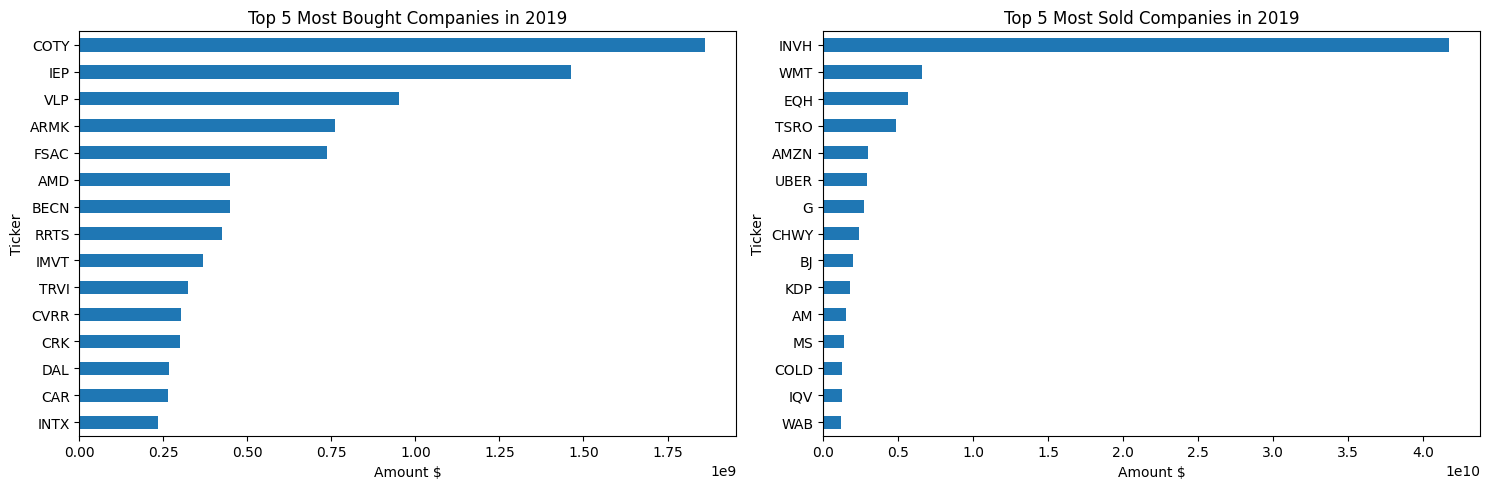

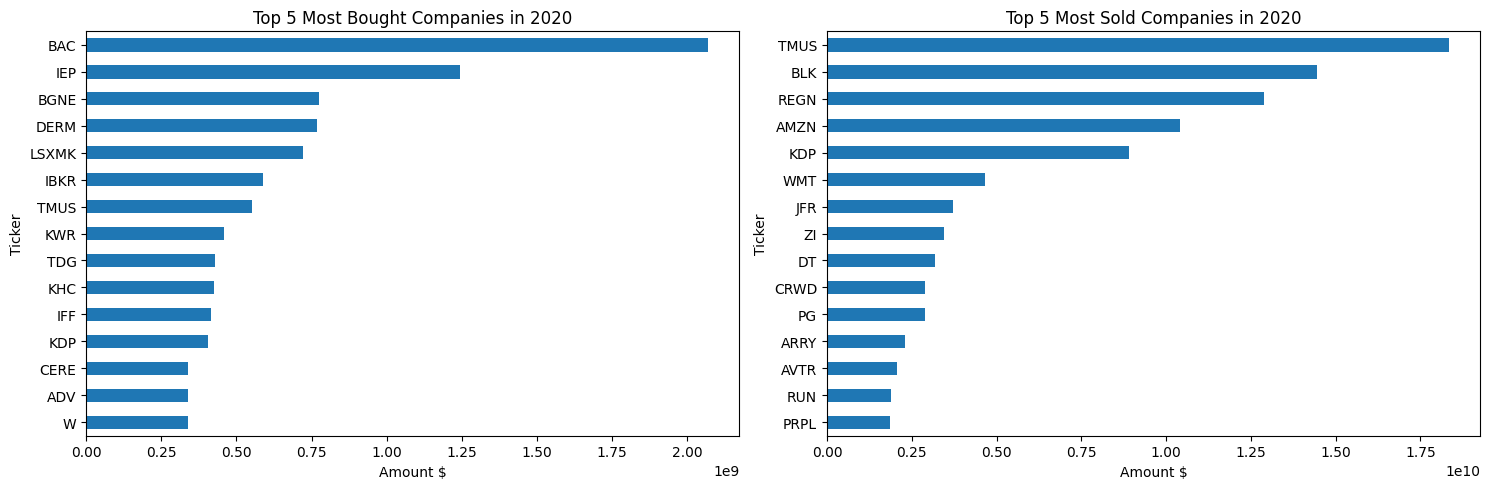

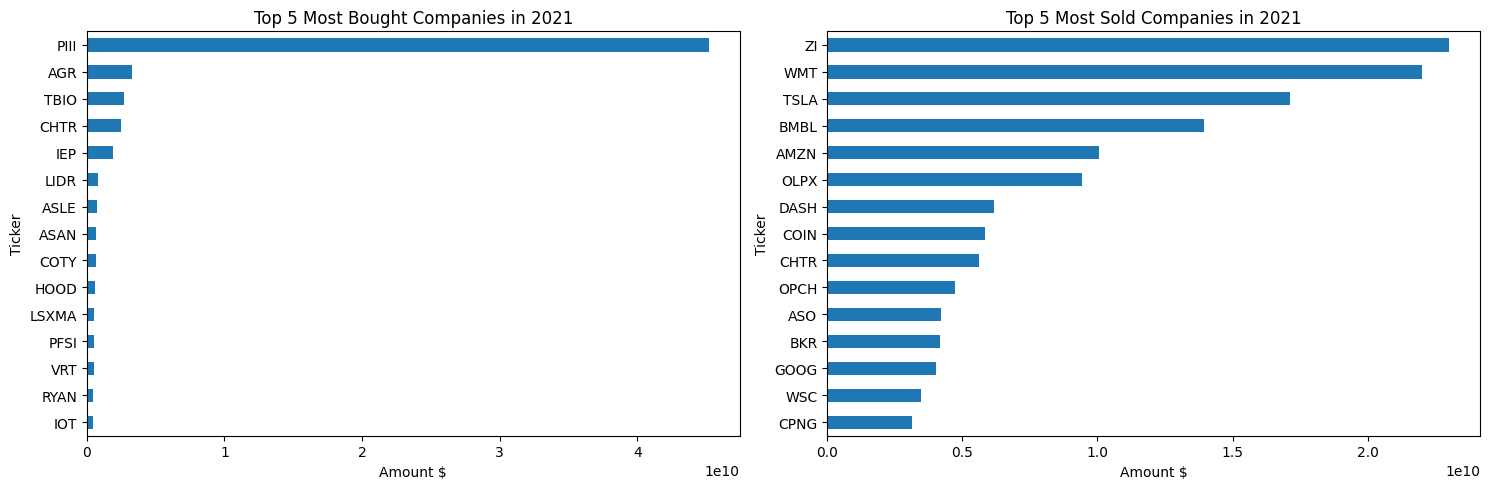

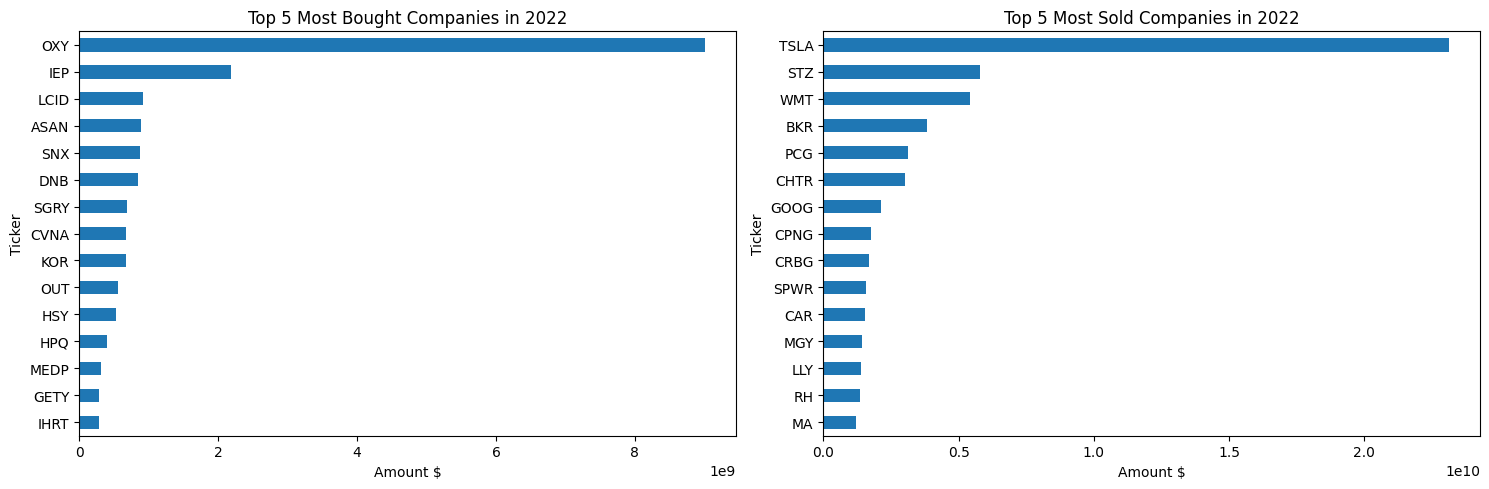

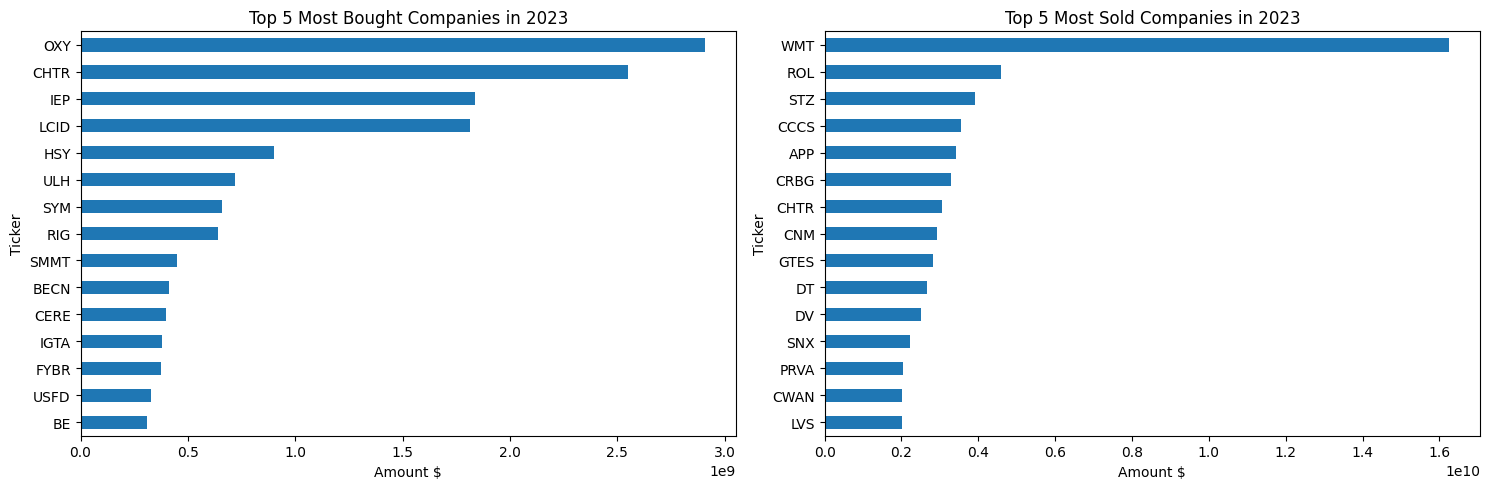

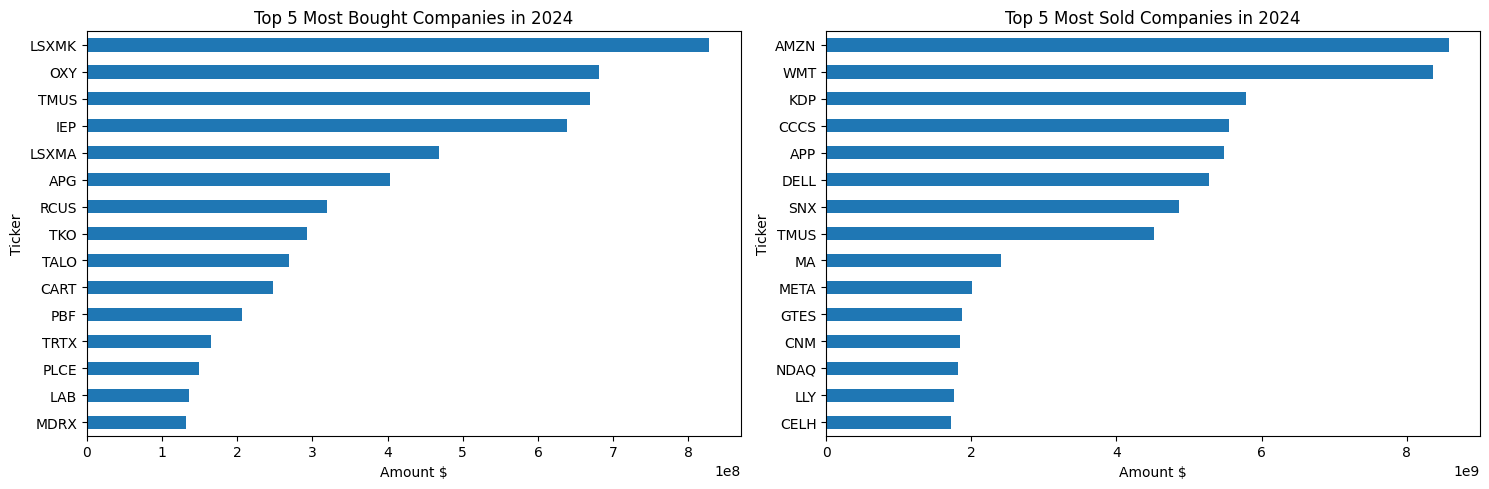

In [36]:
# top 5 stocks that most buy/sell for each years
for i in range(6):
  year_i = all_trades['Date'].dt.year == 2019+i

  acquired_by_ticker = all_trades[(all_trades["acquiredDisposed"]=="A") & year_i] \
      .groupby(["ticker"])['total'] \
      .sum() \
      .sort_values(ascending=False)

  disposed_by_ticker = all_trades[(all_trades["acquiredDisposed"]=="D") & year_i] \
      .groupby(["ticker"])['total'] \
      .sum() \
      .sort_values(ascending=False)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

  ax_ac_ti = acquired_by_ticker.head(15).sort_values(ascending=True).plot.barh(ax=axes[0], y='ticker')
  ax_ac_ti.set_xlabel("Amount $")
  ax_ac_ti.set_ylabel("Ticker")
  ax_ac_ti.set_title(f"Top 5 Most Bought Companies in {2019+i}")
  ax_ac_ti.figure.autofmt_xdate(rotation=0, ha='center')

  ax_di_ti = disposed_by_ticker.head(15).sort_values(ascending=True).plot.barh(ax=axes[1], y='ticker')
  ax_di_ti.set_xlabel("Amount $")
  ax_di_ti.set_ylabel("Ticker")
  ax_di_ti.set_title(f"Top 5 Most Sold Companies in {2019+i}")
  ax_di_ti.figure.autofmt_xdate(rotation=0, ha='center')

  fig.tight_layout()

#### Possible outliers

In this chart, there are five long lines. Let's look at which company it is.
- >INVH (2019) sell
- >PIII (2021) buy
- >OXY (2022) buy
- >TSLA(2022) sell
- >WMT(2023) sell


##### INVH (2019) sell - Possible Outlier

In [37]:
# which company was possible outlier in 2019
all_trades[(all_trades['Date']>='20190101')&(all_trades['Date']<='20191201')&(all_trades['acquiredDisposed']=='D')]\
.groupby('ticker')['total']\
.sum()\
.sort_values(ascending=False)

ticker
INVH    41693912523
WMT      6612597122
EQH      5617350001
TSRO     4876467375
AMZN     2970932316
           ...     
SBFM            324
CSTL            288
CBRI            257
MGYR             61
CCD              21
Name: total, Length: 2618, dtype: int64

In [38]:
all_trades[(all_trades['ticker']=='INVH')&(all_trades['Date']=='20191126')]

,Date,ticker,reportingPersonName,relationship,type,securityTitle,acquiredDisposed,shares,sharePrice,total,...,cum_stock_split,name,cik,exchange,isDelisted,category,sector,industry,sicSector,sicIndustry
123452,2019-11-26,INVH,IH1 Holdco L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,2251159.0,30.05,67647328,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123454,2019-11-26,INVH,Invitation Homes 6 Parent L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,8888562.0,30.05,267101289,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123455,2019-11-26,INVH,Invitation Homes 6 Parent L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,2251159.0,30.05,67647328,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123456,2019-11-26,INVH,Invitation Homes 6 Parent L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,11494129.0,30.05,345398577,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123457,2019-11-26,INVH,Invitation Homes 6 Parent L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,21048685.0,30.05,632512985,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123458,2019-11-26,INVH,IH1 Holdco L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,4720172.0,30.05,141841169,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123459,2019-11-26,INVH,IH1 Holdco L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,3984790.0,30.05,119742940,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123460,2019-11-26,INVH,IH1 Holdco L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,5212503.0,30.05,156635716,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123461,2019-11-26,INVH,IH1 Holdco L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,8888562.0,30.05,267101289,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors
123462,2019-11-26,INVH,Invitation Homes 6 Parent L.P.,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,5212503.0,30.05,156635716,...,1.0,INVITATION HOMES INC,1687229.0,NYSE,False,Domestic Common Stock,Real Estate,REIT - Residential,Finance Insurance And Real Estate,Real Estate Operators (No Developers) & Lessors


those insider trading history looks little bit strange. Possible outliers.

In [39]:
all_trades[(all_trades['ticker']=='INVH')&(all_trades['Date']>='20190101')&(all_trades['Date']<='20191201')]\
.groupby('reportingPersonName')['total']\
.sum()\
.sort_values(ascending=False)

reportingPersonName
BREP IH6 Holdings LLC                               5936625018
BREP VII-NQ Side-by-Side GP L.L.C.                  5936625018
Blackstone Holdings II L.P.                         5936625018
Blackstone Real Estate Partners VII.TE.8-NQ L.P.    5936625018
IH1 Holdco L.P.                                     5936625018
IH3 Holdco GP LLC                                   5936625018
Invitation Homes 6 Parent L.P.                      5936625018
STERNLICHT BARRY S                                   129956111
Tanner Dallas B                                        3289912
FREEDMAN ERNEST MICHAEL                                1813054
Young Charles D.                                       1157854
SOLLS MARK A                                           1138195
Norrell Kimberly K                                      182271
BLAIR BRYCE                                              41641
Name: total, dtype: int64

We can see some insider trades look exactly same. **Possible outlier**. Below is the SEC 8-k report.
 - https://www.sec.gov/ix?doc=/Archives/edgar/data/0001687229/000119312519301181/d839992d8k.htm


##### PIII (2021) buy - Possible Outlier

In [40]:
# which company was possible outlier in 2021
all_trades[(all_trades['Date']>='20211201')&(all_trades['Date']<='20220101')&(all_trades['acquiredDisposed']=='A')]\
.groupby('ticker')['total']\
.sum()\
.sort_values(ascending=False)

ticker
PIII    45179704228
IEP       494243887
IOT       459599984
ASAN      366588081
GTLB      212060953
           ...     
ED               83
CTBI             60
NAVB             30
DXCM             16
XPER              4
Name: total, Length: 739, dtype: int64

In [41]:
all_trades[(all_trades['ticker']=='PIII')&(all_trades['Date']>='20210101')&(all_trades['Date']<='20220101')]\
.groupby('reportingPersonName')['total']\
.sum()\
.sort_values(ascending=False)

reportingPersonName
Bacchus Amir            24009990552
Abdou Sherif            20799912254
Kazarian Gregory N.       210812730
Price Thomas Edmunds      138692901
Atkins Eric                20295791
Name: total, dtype: int64

In [42]:
# sharePrice looks very different from real stock price which is around $10
all_trades[(all_trades['ticker']=='PIII')&(all_trades['reportingPersonName']=='Bacchus Amir')]

,Date,ticker,reportingPersonName,relationship,type,securityTitle,acquiredDisposed,shares,sharePrice,total,...,cum_stock_split,name,cik,exchange,isDelisted,category,sector,industry,sicSector,sicIndustry
463290,2021-12-03,PIII,Bacchus Amir,"{'isDirector': True, 'isOfficer': True, 'offic...",nonDerivative,Class V Common Stock,A,15032528.0,1503.25,22597647716,...,1.0,P3 HEALTH PARTNERS INC,1832511.0,NASDAQ,False,Domestic Common Stock Primary Class,Healthcare,Medical Care Facilities,Services,Services-Health Services
463302,2021-12-03,PIII,Bacchus Amir,"{'isDirector': True, 'isOfficer': True, 'offic...",nonDerivative,Class V Common Stock,A,3758130.0,375.81,1412342836,...,1.0,P3 HEALTH PARTNERS INC,1832511.0,NASDAQ,False,Domestic Common Stock Primary Class,Healthcare,Medical Care Facilities,Services,Services-Health Services


There was stock merge on 03 DEC 2021. This can be the reason that **the data looks outlier**. This is the following link of 8-K in US SEC
- https://www.sec.gov/ix?doc=/Archives/edgar/data/1832511/000119312521347936/d241395d8k.htm


##### OXY (2022) buy

In [43]:
all_trades[(all_trades['Date']>='20220101')&(all_trades['Date']<='20230101')&(all_trades['acquiredDisposed']=='A')]\
.groupby('ticker')['total']\
.sum()\
.sort_values(ascending=False)

ticker
OXY     9002217384
IEP     2179778600
LCID     914999991
ASAN     885401079
SNX      877827294
           ...    
PET            125
BXP             32
NAVB            30
PAY             24
XPOF            14
Name: total, Length: 2888, dtype: int64

In [44]:
all_trades[(all_trades['ticker']=='OXY')&(all_trades['Date']>='20220101')&(all_trades['Date']<='20230101')]\
.groupby('reportingPersonName')['total']\
.sum()\
.sort_values(ascending=False)

reportingPersonName
BERKSHIRE HATHAWAY INC     9001419282
Champion Christopher O        8019553
Hollub Vicki A.               2193177
Peterson Robert L             2062783
Bennett Peter J.              1686534
Jackson Richard A.            1517253
POLADIAN AVEDICK BARUYR       1144600
Dillon Kenneth                 394314
Backus Marcia E.               388148
CHAZEN STEPHEN I                68252
MOORE JACK B                    67172
GOULD ANDREW                    49569
KLESSE WILLIAM R                49569
Name: total, dtype: int64

BERKSHIRE HATHAWAY INC is the insider trader who bought 99% of insider trading in 2022 of Occidental Petroleum Corporation

##### TSLA(2022) sell

In [45]:
all_trades[(all_trades['Date']>='20220101')&(all_trades['Date']<='20230101')&(all_trades['acquiredDisposed']=='D')]\
.groupby('ticker')['total']\
.sum()\
.sort_values(ascending=False)

ticker
TSLA    23121540588
STZ      5789917688
WMT      5407081482
BKR      3820228988
PCG      3124579955
           ...     
VIRI            467
SHO              12
EE               10
SINT              9
EVOL              9
Name: total, Length: 3378, dtype: int64

In [46]:
all_trades[(all_trades['ticker']=='TSLA')&(all_trades['Date']>='20220101')&(all_trades['Date']<='20230101')]\
.groupby('reportingPersonName')['total']\
.sum()\
.sort_values(ascending=False)

reportingPersonName
Musk Elon                   22934307944
DENHOLM ROBYN M                85366294
Baglino Andrew D               38430207
Wilson-Thompson Kathleen       30348063
Taneja Vaibhav                 19823766
Kirkhorn Zachary               13264314
Name: total, dtype: int64

From April through December in 2022, Musk sold \$22.9 billion worth of Tesla stock in unscheduled sales to help fund his $44 billion purchase of Twitter that year

##### WMT(2023) sell - Possible Outlier

In [47]:
all_trades[(all_trades['Date']>='20230101')&(all_trades['Date']<='20240101')&(all_trades['acquiredDisposed']=='D')]\
.groupby('ticker')['total']\
.sum()\
.sort_values(ascending=False)

ticker
WMT     16245883049
ROL      4600007064
STZ      3903466373
CCCS     3539768827
APP      3414166686
           ...     
KRO               9
EVFM              7
LEO               3
DSM               2
DMF               1
Name: total, Length: 3549, dtype: int64

In [48]:
all_trades[(all_trades['ticker']=='WMT')&(all_trades['Date']>='20230101')&(all_trades['Date']<='20240101')]\
.groupby('reportingPersonName')['total']\
.sum()\
.sort_values(ascending=False)

reportingPersonName
WALTON ALICE L                5388440974
WALTON JIM C                  5388440974
WALTON S ROBSON               5388440974
McMillon C Douglas              27558809
Furner John R.                  12804173
Rainey John D                    7664620
Kumar Suresh                     6914001
Brand Rachel L                   6224192
McKenna Judith J                 5089491
McLay Kathryn J.                 5057368
Biggs M. Brett                   4793651
Bartlett Daniel J                2514232
Chojnowski David                 1409879
STEPHENSON RANDALL L             1000168
Nicholas Christopher James        350130
Morris Donna                      179581
Name: total, dtype: int64

In [49]:
all_trades[(all_trades['ticker']=='WMT')&(all_trades['Date']>='20230101')&(all_trades['Date']=='20231228')]

,Date,ticker,reportingPersonName,relationship,type,securityTitle,acquiredDisposed,shares,sharePrice,total,...,cum_stock_split,name,cik,exchange,isDelisted,category,sector,industry,sicSector,sicIndustry
782445,2023-12-28,WMT,McMillon C Douglas,"{'isDirector': True, 'isOfficer': True, 'offic...",nonDerivative,Common Stock,D,9708.0,157.7400,1531340,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores
782447,2023-12-28,WMT,WALTON JIM C,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,2406081.0,157.7160,379477471,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores
782448,2023-12-28,WMT,WALTON JIM C,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,539437.0,157.7815,85113180,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores
782449,2023-12-28,WMT,WALTON ALICE L,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,2406081.0,157.7160,379477471,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores
782450,2023-12-28,WMT,WALTON ALICE L,"{'isDirector': False, 'isOfficer': False, 'isT...",nonDerivative,Common Stock,D,539437.0,157.7815,85113180,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores
782451,2023-12-28,WMT,WALTON S ROBSON,"{'isDirector': True, 'isOfficer': False, 'isTe...",nonDerivative,Common Stock,D,2406081.0,157.7160,379477471,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores
782452,2023-12-28,WMT,WALTON S ROBSON,"{'isDirector': True, 'isOfficer': False, 'isTe...",nonDerivative,Common Stock,D,539437.0,157.7815,85113180,...,1.0,WALMART INC,104169.0,NYSE,False,Domestic Common Stock,Consumer Defensive,Discount Stores,Retail Trade,Retail-Variety Stores


Those Insider trading of three Walton looks same. **Possible Outliers.**

### **Portion of each sector for each year**

In [50]:
# look up the portion of each sectors for each years
def print_sector_stats(trades, title="Acquisition Distribution per Sector per Year"):
  trades.set_index('Date',inplace=True)
  df = trades.groupby([pd.Grouper(freq='Y'), "acquiredDisposed", "sector"])['total'].sum()

  fig, ax = plt.subplots()

  unstacked = df.unstack()
  unstacked.plot.bar(stacked=True, ax=ax, figsize=(8, 5))

  ax.legend(loc=2)

  ax.grid(True)
  ax.set_xticks(range(unstacked.index.size))
  ax.set_xticklabels([idx[0].strftime('%Y') for idx in unstacked.index])
  ax.figure.autofmt_xdate(rotation=0, ha='center')
  ax.set_xlabel("Year")
  ax.set_ylabel("Amount $")
  ax.set_title(title)

  plt.show()

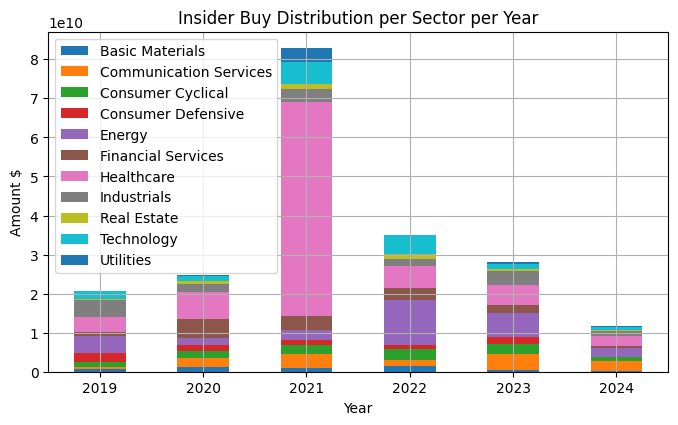

In [51]:
print_sector_stats(all_trades[all_trades["acquiredDisposed"]=="A"],\
        "Insider Buy Distribution per Sector per Year")

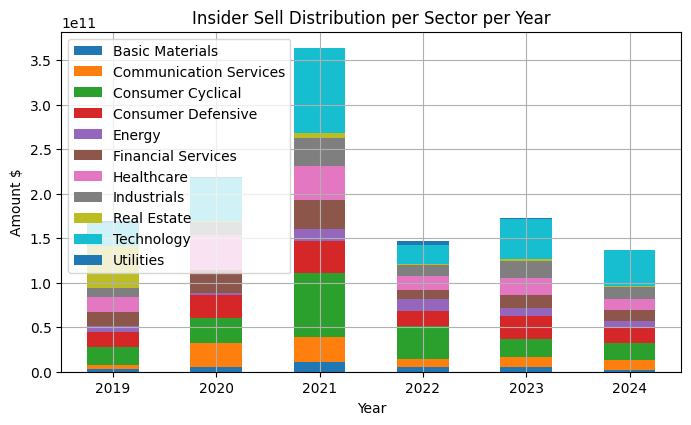

In [52]:
print_sector_stats(all_trades[all_trades["acquiredDisposed"]=="D"],\
        "Insider Sell Distribution per Sector per Year")

### **Volume of insider buys and sells together with S&P500 movement through time**

In [53]:
sp500 =yf.Ticker('^SPX').history(start="2019-01-01",auto_adjust=False)
sp500.index = pd.to_datetime(sp500.index.strftime('%Y-%m-%d'))

In [54]:
#all_trades_temp = all_trades[all_trades['ticker']!='PIII']
# ticker PIII looks outlier

In [55]:
acquired_monthly_vol = all_trades[(all_trades["acquiredDisposed"]=="A")] \
                .groupby(["Date"])['total'] \
                .sum().resample('M').sum()
disposed_monthly_vol = all_trades[(all_trades["acquiredDisposed"]=="D")] \
                .groupby(["Date"])['total'] \
                .sum().resample('M').sum()

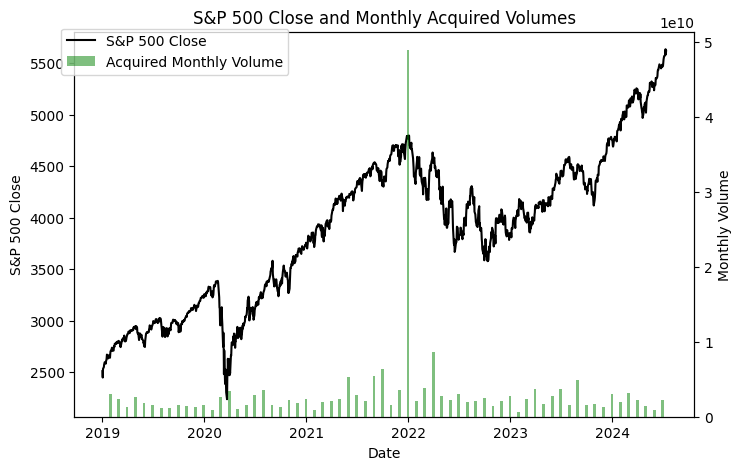

In [56]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot S&P 500 close prices
ax1.plot(sp500['Close'], label='S&P 500 Close', color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close', color='black')
ax1.tick_params(axis='y')

# Create a second y-axis for the daily volumes
ax2 = ax1.twinx()

# Plotting the acquired and disposed monthly volumes as bar plots
width = 10  # Width of the bars

ax2.bar(acquired_monthly_vol.index, acquired_monthly_vol, width=width, label='Acquired Monthly Volume', color='g', alpha=0.5)
ax2.set_ylabel('Monthly Volume', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.title('S&P 500 Close and Monthly Acquired Volumes')
plt.show()

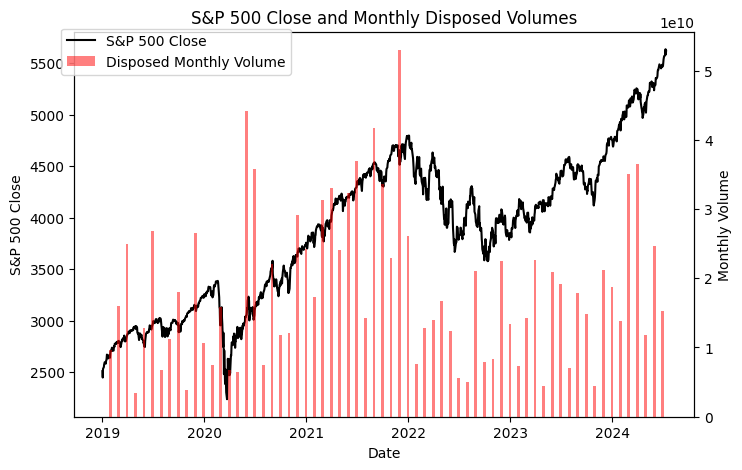

In [57]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot S&P 500 close prices
ax1.plot(sp500['Close'], label='S&P 500 Close', color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close', color='black')
ax1.tick_params(axis='y')

# Create a second y-axis for the daily volumes
ax2 = ax1.twinx()

# Plotting the acquired and disposed monthly volumes as bar plots
width = 10  # Width of the bars

ax2.bar(disposed_monthly_vol.index, disposed_monthly_vol, width=width, label='Disposed Monthly Volume', color='r', alpha=0.5)
ax2.set_ylabel('Monthly Volume', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.title('S&P 500 Close and Monthly Disposed Volumes')
plt.show()

## **Defining unusually good insider trade**

Lets now transform the dataset to include the share prices at some periods in future after the insider trade has been made. Our initial problem was how to determine whether the trade was made at good or bad moment. First idea was to check the behaviour of stock price at some period in near future (1 week, 1, 3, 6 months). The problem with this is that those values indicate how did the stock perform in this period, not how good was the insider trade. For example, if TSLA stock rose 60% in year 2019, even if insider bought at minimum price inside that year, his return in any of those periods will still be highly correlated with those 60%.

Our idea to approach this is to normalize return of specific insider trade with return of the corresponding stock inside that year. Lets work with above example and say TSLA increased 60% from 01.01.2019. to 01.01.2020. which comes to about 12.5% de-annualized 3-month return. Lets assume our insider bought on 25.02.2019. and stock rose 20% from 25.02.2019. to 25.05.2019. We will then say that our insider made 20% - 12.5% = 8.5% more in this period. In other words he chose a good moment to buy the stock. We will call this this value of 8.5% "outperformance" of the trader.

The volatility of stock will ofcourse induce variance in those values, even the randomized trading strategy will have moments of "good" and "bad" buys, but with a mean "outperformance" of 0. We expect to identify insider traders who constantly outperform the trading stock by pointing out at those who have mean "outperformance" significantly different than 0. We will define this significance by standardizing outperformance for volatilities for each corresponding period.

For the disposals of stocks, we will rate the insider trade in similar fashion by looking at potential money saved by selling the stock if stock went down and missed returns if stock went up. There are few biases that came to our mind that could be present in this data. For example, it might be that sellers more often need to forcefully sell in need of cas and therefore might not care about the whether the current moment is good or bad for such a trade.

To denoise the data a bit, for the future prices that we are comparing to, we will take some kind of averaged value to reduce the noise in day-to-day fluctations.

#### **Calculating the yearly returns, volatility and de-annualized returns for each timeframe of interest**



In [58]:
# Ensure the Date column is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Add Year column
stock_data['Year'] = stock_data['Date'].dt.year

# Function to calculate annualized return
def annualized_return(start_price, end_price, days):
    if days == 0:
        return np.nan  # or some other default value or handling
    return ((end_price / start_price) ** (365 / days)) - 1

# Calculate daily returns
stock_data['Daily Return'] = stock_data.groupby('ticker')['Adj Close'].pct_change()

# Calculate the yearly return and daily volatility for each ticker and year
yearly_stats = []

for ticker, group in stock_data.groupby('ticker'):
    for year, year_group in group.groupby('Year'):
        year_group = year_group.sort_values('Date')
        start_price = year_group.iloc[0]['Adj Close']
        end_price = year_group.iloc[-1]['Adj Close']
        start_date = year_group.iloc[0]['Date']
        end_date = year_group.iloc[-1]['Date']
        days = (end_date - start_date).days

        if days < 365:  # Incomplete year
            yearly_return = annualized_return(start_price, end_price, days)
        else:
            yearly_return = (end_price / start_price) - 1

        # Calculate daily volatility
        daily_volatility = year_group['Daily Return'].std()

        yearly_stats.append({
            'ticker': ticker,
            'Year': year,
            'Yearly Return': yearly_return,
            'Daily Volatility': daily_volatility
        })

yearly_stats_df = pd.DataFrame(yearly_stats)

<ipython-input-58-336e942f6cb8>:11: RuntimeWarning: invalid value encountered in scalar power
  return ((end_price / start_price) ** (365 / days)) - 1


In [59]:
yearly_returns_df = yearly_stats_df.copy()

yearly_returns_df['7d_ann'] = (1 + yearly_returns_df['Yearly Return'])**(7/365) - 1
yearly_returns_df['1m_ann'] = (1 + yearly_returns_df['Yearly Return'])**(1/12) - 1
yearly_returns_df['3m_ann'] = (1 + yearly_returns_df['Yearly Return'])**(1/4) - 1
yearly_returns_df['6m_ann'] = (1 + yearly_returns_df['Yearly Return'])**(1/2) - 1

In [60]:
yearly_returns_df.query('ticker == "TSLA"')

,ticker,Year,Yearly Return,Daily Volatility,7d_ann,1m_ann,3m_ann,6m_ann
26962,TSLA,2019,0.351156,0.030817,0.005789,0.025397,0.078143,0.162392
26963,TSLA,2020,7.248049,0.056255,0.041295,0.192237,0.694680,1.871942
26964,TSLA,2021,0.454053,0.034494,0.007205,0.031688,0.098108,0.205841
26965,TSLA,2022,-0.695986,0.042002,-0.022576,-0.094460,-0.257454,-0.448626
26966,TSLA,2023,1.325338,0.034049,0.016315,0.072854,0.234871,0.524906
26967,TSLA,2024,-0.016232,0.035070,-0.000314,-0.001363,-0.004083,-0.008149


In [61]:
# Ensure the Date column is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set Date as the index for easier rolling calculations
stock_data.set_index('Date', inplace=True)

# Calculate centered rolling averages
stock_data['3_day_avg'] = stock_data.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=3, center=True, min_periods=1).mean())
stock_data['9_day_avg'] = stock_data.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=9, center=True, min_periods=1).mean())
stock_data['17_day_avg'] = stock_data.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=17, center=True, min_periods=1).mean())

# Reset index to get Date back as a column
stock_data.reset_index(inplace=True)

#### **Enriching insider trades dataframe with future prices**

What we found out later is that there are many traders who for some reason have very large number of transactions in one day on different prices. This is probably due to splitting the desired amount in different transactions for reasons such as insufficient volume and other regulatory reasons. Also, some traders did both acquisions and disposals at the same price on the same day, so we will replace that with net difference in their trades for that day.

We also noticed that 'sharePrice' from insider trading data and price from historical data sometimes dont match even after correcting for stock splits. We investigated that this is mostly for two reasons: missing information about stock split data and discounted prices that insiders sometimes have opportunity to buy or sell at. For this reason we will use historical price as the price at which insider made transaction on.

In [62]:
all_trades['dir'] = np.where(all_trades['acquiredDisposed'] == 'A', 1, -1)
all_trades['total'] = all_trades['dir'] * all_trades['total']
all_trades = all_trades.drop(columns = ['dir'])
all_trades['sharePrice'] = all_trades['Adj Close']
all_trades['size'] = all_trades['total'] / all_trades['sharePrice']
all_trades = all_trades.drop(columns = ['sharePrice'])
all_trades = all_trades[['Date', 'ticker', 'reportingPersonName', 'relationship', 'sector', 'size', 'total']]
all_trades = all_trades.groupby(['Date', 'ticker', 'reportingPersonName', 'relationship', 'sector']).sum().reset_index()
all_trades['acquiredDisposed'] = np.where(all_trades['total'] > 0, 'A', 'D')
all_trades['total'] = abs(all_trades['total'])
all_trades['sharePrice'] = abs(all_trades['total'] / all_trades['size'])
all_trades = all_trades.drop(columns = ['size'])
all_trades.head()

,Date,ticker,reportingPersonName,relationship,sector,total,acquiredDisposed,sharePrice
0,2019-01-01,ACN,Abbosh Omar,"{'isDirector': False, 'isOfficer': True, 'offi...",Technology,390146,D,130.096802
1,2019-01-01,ACN,CLARK RICHARD P,"{'isDirector': False, 'isOfficer': True, 'offi...",Technology,23157,D,130.096802
2,2019-01-01,ACN,Deblaere Johan,"{'isDirector': False, 'isOfficer': True, 'offi...",Technology,29753,D,130.096802
3,2019-01-01,ACN,Jerdee Chad T,"{'isDirector': False, 'isOfficer': True, 'offi...",Technology,118307,D,130.096802
4,2019-01-01,ACN,LONDON DANIEL T,"{'isDirector': False, 'isOfficer': True, 'offi...",Technology,240263,D,130.096802


In [63]:
# Ensure the periodOfReport and Date columns are in datetime format
all_trades['Date'] = pd.to_datetime(all_trades['Date'])
all_trades['Date'] = pd.to_datetime(all_trades['Date'])

# Filter the relevant columns from all_trades
filtered_trades = all_trades.copy()

filtered_trades['7_days'] = filtered_trades['Date'] + pd.DateOffset(days=7)
filtered_trades['1_month'] = filtered_trades['Date'] + pd.DateOffset(months=1)
filtered_trades['3_months'] = filtered_trades['Date'] + pd.DateOffset(months=3)
filtered_trades['6_months'] = filtered_trades['Date'] + pd.DateOffset(months=6)

In [64]:
filtered_trades.sample()

,Date,ticker,reportingPersonName,relationship,sector,total,acquiredDisposed,sharePrice,7_days,1_month,3_months,6_months
108948,2020-05-13,TWLO,Shipchandler Khozema,"{'isDirector': False, 'isOfficer': True, 'offi...",Communication Services,10310541,D,187.419998,2020-05-20,2020-06-13,2020-08-13,2020-11-13


In [65]:
stock_data.sample()

,Date,Close,Adj Close,Volume,Stock Splits,ticker,Year,Daily Return,3_day_avg,9_day_avg,17_day_avg
6473385,2019-02-11,9.41,7.383559,2300,0.0,CXH,2019,-0.001062,7.383023,7.391569,7.397144


In [66]:
def merge_stock_data(df, future_trades, future_prices, suffix):
    # Sort both dataframes by 'Date' to prepare for merge_asof
    df_sorted = df.sort_values(['Date', 'ticker'])
    stock_data_sorted = stock_data.sort_values(['Date', 'ticker'])

    # Perform merge_asof operation
    merged_df = pd.merge_asof(df_sorted, stock_data_sorted[['Date', 'ticker', future_prices]],
                              left_on=future_trades, right_on = 'Date',
                              by='ticker',
                              direction='forward', suffixes=('', f'_{suffix}'))

    return merged_df

# Example usage:
filtered_trades = merge_stock_data(filtered_trades, '7_days', 'Adj Close', '7d')
filtered_trades = merge_stock_data(filtered_trades, '1_month', '3_day_avg', '1m')
filtered_trades = merge_stock_data(filtered_trades, '3_months', '9_day_avg', '3m')
filtered_trades = merge_stock_data(filtered_trades, '6_months', '17_day_avg', '6m')

#### **Scoring insider trades**

Now it comes to calculating moves of stock prices in those periods and calculating "outperformance" for every trade as explained above.

In [67]:
# Calculate moves for each time period
filtered_trades['7d_move'] = filtered_trades['Adj Close'] / filtered_trades['sharePrice'] - 1
filtered_trades['1m_move'] = filtered_trades['3_day_avg'] / filtered_trades['sharePrice'] - 1
filtered_trades['3m_move'] = filtered_trades['9_day_avg'] / filtered_trades['sharePrice'] - 1
filtered_trades['6m_move'] = filtered_trades['17_day_avg'] / filtered_trades['sharePrice'] - 1

# Merge yearlies
filtered_trades['Year'] = filtered_trades['Date'].dt.year
filtered_trades = filtered_trades.merge(yearly_returns_df, left_on=['ticker', 'Year'], right_on=['ticker', 'Year'], how='left')

# Calculate performance depending was it a buy or sell
filtered_trades['7d_perf'] = np.where(filtered_trades['acquiredDisposed'] == 'D',
                                      -(filtered_trades['7d_move'] - filtered_trades['7d_ann']),
                                      filtered_trades['7d_move'] - filtered_trades['7d_ann'])
filtered_trades['1m_perf'] = np.where(filtered_trades['acquiredDisposed'] == 'D',
                                      -(filtered_trades['1m_move'] - filtered_trades['1m_ann']),
                                      filtered_trades['1m_move']- filtered_trades['1m_ann'])
filtered_trades['3m_perf'] = np.where(filtered_trades['acquiredDisposed'] == 'D',
                                      -(filtered_trades['3m_move'] - filtered_trades['3m_ann']),
                                      filtered_trades['3m_move'] - filtered_trades['3m_ann'])
filtered_trades['6m_perf'] = np.where(filtered_trades['acquiredDisposed'] == 'D',
                                      -(filtered_trades['6m_move'] - filtered_trades['6m_ann']),
                                      filtered_trades['6m_move'] - filtered_trades['6m_ann'])


We will compare outperformances for each time period with volatility of this time period for the given year to assign z-scores for each trade and respective time period.

In [68]:
filtered_trades['7d_z_score'] = (filtered_trades['7d_perf'] - filtered_trades['7d_ann']) / (filtered_trades['Daily Volatility'] * 7**(1/2))
filtered_trades['1m_z_score'] = (filtered_trades['1m_perf'] - filtered_trades['1m_ann']) / (filtered_trades['Daily Volatility'] * 30.4167**(1/2))
filtered_trades['3m_z_score'] = (filtered_trades['3m_perf'] - filtered_trades['3m_ann']) / (filtered_trades['Daily Volatility'] * 91.2501**(1/2))
filtered_trades['6m_z_score'] = (filtered_trades['6m_perf'] - filtered_trades['6m_ann']) / (filtered_trades['Daily Volatility'] * 182.5002**(1/2))

In [69]:
filtered_trades = filtered_trades[['Date', 'ticker', 'reportingPersonName', 'relationship', 'acquiredDisposed', 'sharePrice', 'total', 'sector',
                                   'Adj Close', '7d_z_score',
                                   '3_day_avg', '1m_z_score',
                                   '9_day_avg', '3m_z_score',
                                   '17_day_avg', '6m_z_score']].rename(columns = {'Adj Close' : '7d_price',
                                                                                  '3_day_avg' : '1m_price',
                                                                                  '9_day_avg' : '3m_price',
                                                                                  '17_day_avg' : '6m_price'})

In [70]:
filtered_trades = filtered_trades.dropna(subset=filtered_trades.columns[-8:], how='all')

In [71]:
filtered_trades.sample(5)

,Date,ticker,reportingPersonName,relationship,acquiredDisposed,sharePrice,total,sector,7d_price,7d_z_score,1m_price,1m_z_score,3m_price,3m_z_score,6m_price,6m_z_score
151280,2020-12-26,UFPI,Wooldridge Michael G.,"{'isDirector': True, 'isOfficer': False, 'isTe...",A,56.163921,1820,Basic Materials,54.471340,-0.395376,56.817726,-0.085764,72.050071,0.589922,72.791177,0.255800
53181,2019-08-30,CCEL,Wheeler Jonathan H.,"{'isDirector': True, 'isOfficer': False, 'isTe...",A,7.530000,70000,Healthcare,7.120000,-0.748658,8.213333,0.581457,7.716667,0.072194,7.024118,-0.209873
363302,2023-04-12,PI,DOSSETT JEFFREY,"{'isDirector': False, 'isOfficer': True, 'offi...",D,135.179993,66545,Technology,141.399994,-0.397135,93.836667,1.266328,88.085555,0.832817,52.792353,1.030214
439269,2024-02-26,ISRG,Brosius Mark,"{'isDirector': False, 'isOfficer': True, 'offi...",D,388.269989,169161,Healthcare,400.589996,-0.750427,396.480001,-0.239902,401.672221,-0.226103,NaN,NaN
231028,2021-11-15,ARMK,Harrington Lauren A,"{'isDirector': False, 'isOfficer': True, 'offi...",D,27.180212,5126,Industrials,25.977612,0.881697,24.389669,0.981476,26.827705,0.071581,24.315141,0.411387


#### **Overview of scores**

Now we have a solid measure of performance of each trade looking some period in advance. Lets take a look at overall distribution of z-scores to see does it make sense.

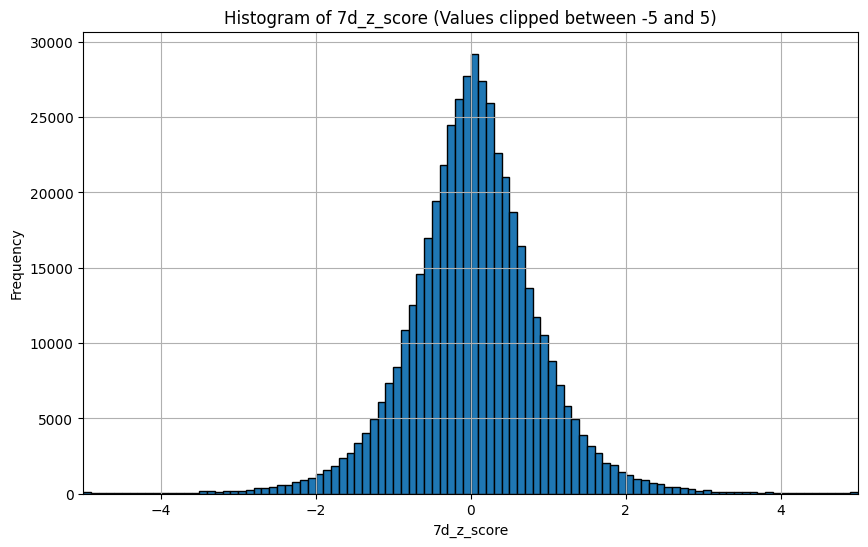

In [72]:
# Create a copy of the DataFrame
filtered_trades_clipped = filtered_trades.copy()

# Clip values in '7d_z_score' column in the copied DataFrame
filtered_trades_clipped['7d_z_score'] = np.clip(filtered_trades_clipped['7d_z_score'], a_min=-5, a_max=5)

# Plotting histogram for clipped data
plt.figure(figsize=(10, 6))
plt.hist(filtered_trades_clipped['7d_z_score'], bins=100, range=(-5, 5), edgecolor='black')
plt.title('Histogram of 7d_z_score (Values clipped between -5 and 5)')
plt.xlabel('7d_z_score')
plt.ylabel('Frequency')
plt.grid(True)

# Set x-axis limit to show only values between -10 and 10
plt.xlim(-5, 5)

plt.show()

Everyone loves to see beautiful histograms like this! Lets take a look for other 3 columns as well:

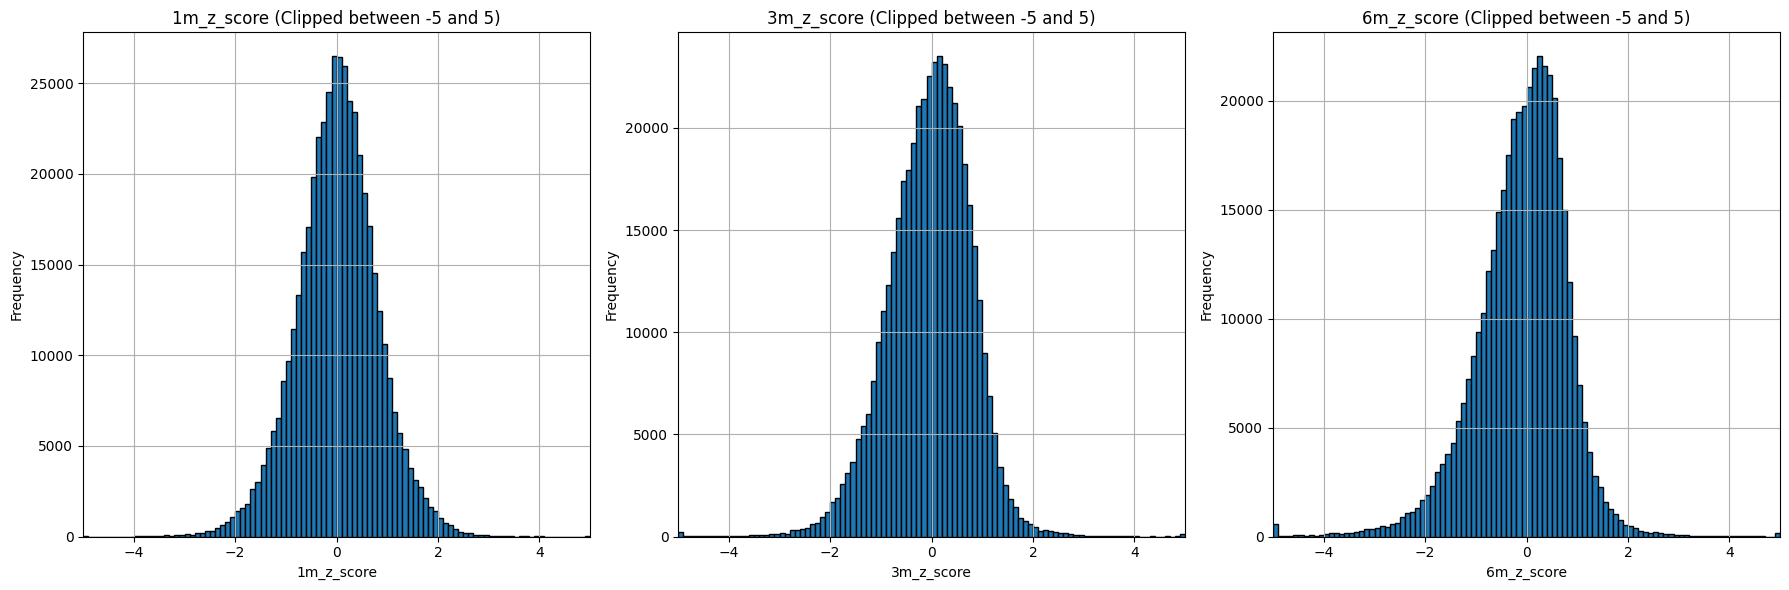

In [73]:
# Clip values in '1m_z_score', '3m_z_score', and '6m_z_score' columns
filtered_trades_clipped['1m_z_score'] = np.clip(filtered_trades_clipped['1m_z_score'], a_min=-5, a_max=5)
filtered_trades_clipped['3m_z_score'] = np.clip(filtered_trades_clipped['3m_z_score'], a_min=-5, a_max=5)
filtered_trades_clipped['6m_z_score'] = np.clip(filtered_trades_clipped['6m_z_score'], a_min=-5, a_max=5)

# Plotting histograms for clipped data side by side
plt.figure(figsize=(18, 6))

# Plotting 1m_z_score
plt.subplot(1, 3, 1)
plt.hist(filtered_trades_clipped['1m_z_score'], bins=100, range=(-5, 5), edgecolor='black')
plt.title('1m_z_score (Clipped between -5 and 5)')
plt.xlabel('1m_z_score')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(-5, 5)

# Plotting 3m_z_score
plt.subplot(1, 3, 2)
plt.hist(filtered_trades_clipped['3m_z_score'], bins=100, range=(-5, 5), edgecolor='black')
plt.title('3m_z_score (Clipped between -5 and 5)')
plt.xlabel('3m_z_score')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(-5, 5)

# Plotting 6m_z_score
plt.subplot(1, 3, 3)
plt.hist(filtered_trades_clipped['6m_z_score'], bins=100, range=(-5, 5), edgecolor='black')
plt.title('6m_z_score (Clipped between -5 and 5)')
plt.xlabel('6m_z_score')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(-5, 5)

plt.tight_layout()
plt.show()

This all looks solid so far, lets take a look at mean values for all 4 columns.

In [74]:
# Calculate mean values
mean_values = filtered_trades_clipped[['7d_z_score', '1m_z_score', '3m_z_score', '6m_z_score']].mean()

# Print mean values
print("Mean values:")
print(mean_values)

Mean values:
7d_z_score    0.036882
1m_z_score    0.011132
3m_z_score   -0.044218
6m_z_score   -0.095355
dtype: float64


Interesting results show up for first timespan of 7 days. It seems that insider traders do exceptionally good trades over short timespans.

On the other hand, 6 month and 3 month z-scores open up some questions such as being way too much to have any meaningfull non-public information or fact that most of the stocks are constantly growing and big part of the trades are either forced sells or scheduled sells from people who just want to cash out.

Lets now look at mean values for both buys and sells:

In [75]:
# Calculate mean values based on 'acquiredDisposed' column
mean_values = filtered_trades_clipped.groupby('acquiredDisposed')[['7d_z_score', '1m_z_score', '3m_z_score', '6m_z_score']].mean()

# Display mean values in table format
print("Mean values based on acquiredDisposed:")
print(mean_values)

Mean values based on acquiredDisposed:
                  7d_z_score  1m_z_score  3m_z_score  6m_z_score
acquiredDisposed                                                
A                   0.101441    0.073218    0.020717   -0.103653
D                   0.012185   -0.012612   -0.068996   -0.092063


All in all, the data set is way too big to make any specific conclusions than those above by using point-wise values as results. We will try to extract some traders who have very good results and see if we can copy-trade them.

There is also some extra information about the position of person in company given in column 'relationship' as dictionary. Lets extract that in case we need it later

In [76]:
print(filtered_trades['relationship'][0])

{'isDirector': False, 'isOfficer': True, 'officerTitle': 'Grp Chief Exec-Com, Med & Tech', 'isTenPercentOwner': False, 'isOther': False}


In [77]:
# Convert the string representation of dictionaries to actual dictionaries
filtered_trades['relationship'] = filtered_trades['relationship'].apply(ast.literal_eval)

# Extracting values from the 'relationship' column and expanding them into new columns
filtered_trades['director'] = filtered_trades['relationship'].apply(lambda x: x['isDirector'])
filtered_trades['officer'] = filtered_trades['relationship'].apply(lambda x: x['isOfficer'])
filtered_trades['tp_owner'] = filtered_trades['relationship'].apply(lambda x: x['isTenPercentOwner'])
filtered_trades['other'] = filtered_trades['relationship'].apply(lambda x: x['isOther'])
filtered_trades['officer_title'] = filtered_trades['relationship'].apply(lambda x: x['officerTitle'] if x['isOfficer'] else '')

# Drop the original 'relationship' column if no longer needed
filtered_trades = filtered_trades.drop(columns=['relationship'])

In [78]:
filtered_trades.sample()

,Date,ticker,reportingPersonName,acquiredDisposed,sharePrice,total,sector,7d_price,7d_z_score,1m_price,1m_z_score,3m_price,3m_z_score,6m_price,6m_z_score,director,officer,tp_owner,other,officer_title
28661,2019-04-16,AMPH,Shandell Jason B.,D,20.58,195879,Healthcare,20.799999,-0.19995,21.803333,-0.533382,19.944445,0.159988,19.928824,0.115909,True,True,False,False,President and General Counsel


In [79]:
len(filtered_trades['officer_title'].unique()) # this number thould be 15862

15836

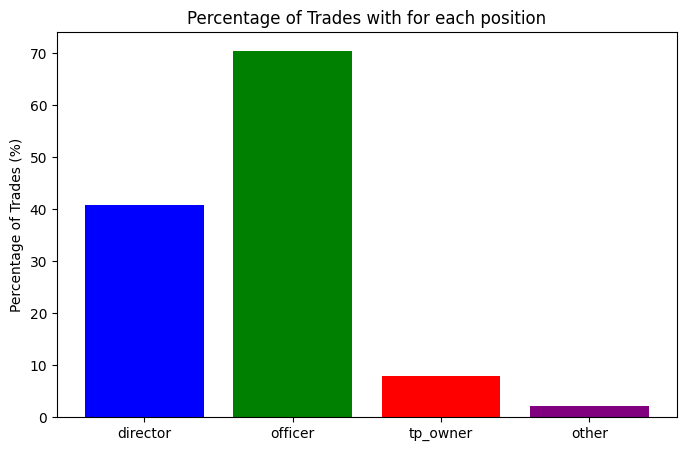

In [80]:
# Calculate the percentage of trades with each flag set to True
percentages = {
    'director': filtered_trades['director'].mean() * 100,
    'officer': filtered_trades['officer'].mean() * 100,
    'tp_owner': filtered_trades['tp_owner'].mean() * 100,
    'other': filtered_trades['other'].mean() * 100
}

# Create a bar plot for the percentages
plt.figure(figsize=(8, 5))
plt.bar(percentages.keys(), percentages.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Percentage of Trades (%)')
plt.title('Percentage of Trades with for each position')
plt.show()

Most of the trades are done by Officers which makes sense since they are those who usually get compensated partially in stocks.

## **Simple copy-trading strategy**

Lets first remove all trades that were done before or after the company was publicly traded since those are obviously not possible to follow to someone who has access only to public stock market.

In [81]:
# Calculate min and max dates for each ticker in stock_data
ticker_date_ranges = stock_data.groupby('ticker')['Date'].agg(['min', 'max']).reset_index()

# Merge min and max dates back to filtered_trades
filtered_trades = pd.merge(filtered_trades, ticker_date_ranges, on='ticker', how='left')

# Filter rows in filtered_trades based on date range
filtered_trades = filtered_trades[(filtered_trades['Date'] >= filtered_trades['min']) &
                                  (filtered_trades['Date'] <= filtered_trades['max'])]
# Drop min and max columns if no longer needed
filtered_trades.drop(['min', 'max'], axis=1, inplace=True)

Lets try to do simple copy trading strategy by identifying people who have unusually high z-score values. Lets focus for now 1 month z-scores and those who have at least 20 trades in the whole dataset. We will only look at trades done before 01.01.2023. and then try to copy them in the future period.

In [82]:
copy_trades = filtered_trades.copy()
no_persons = 100

# Keep only the specified columns
copy_trades = copy_trades[['Date', 'ticker', 'reportingPersonName', '1m_z_score']]

# Convert 'Date' column to datetime format
copy_trades['Date'] = pd.to_datetime(copy_trades['Date'])

# Remove rows with reportingPersonName having less than 20 occurrences
name_counts = copy_trades['reportingPersonName'].value_counts()
copy_trades = copy_trades[copy_trades['reportingPersonName'].isin(name_counts[name_counts >= 20].index)].dropna()

We will clip z-scores to [-5, 5] to ensure we dont encounter too high values and take a look at those who have highest average z-score values.

In [83]:
# Clip '1m_z_score' values to range -5 to 5
copy_trades['1m_z_score'] = copy_trades['1m_z_score'].clip(lower=-5, upper=5)

# Calculate average 1m_z_score for each reportingPersonName
average_z_scores = copy_trades.query('Date < "2023-01-01"').groupby('reportingPersonName')['1m_z_score'].mean()

# Sort by average 1m_z_score in descending order
top_names = average_z_scores.sort_values(ascending=False).head(no_persons)

# Display the top 100 reportingPersonName with highest average 1m_z_score
print("Top names by highest average 1m_z_score (clipped to -5 to 5):")
print(top_names.head(50))

Top names by highest average 1m_z_score (clipped to -5 to 5):
reportingPersonName
Corre Partners Management, LLC          1.352651
Wool Kyle Michael                       1.271735
Stedham Adam H                          1.260296
Clark Christopher                       1.210586
SLTA IV (GP), L.L.C.                    1.182890
DAHL JAMES H                            1.011144
Terem Shai                              1.008306
Buller Benyamin                         0.972071
GELLER MARSHALL S                       0.959599
Mendelson Daniel Newman                 0.956569
O'Callahan Elizabeth M                  0.929982
Shanmugam Muthusamy                     0.928330
Landesberg Stuart                       0.916877
DUGGAN ROBERT W                         0.889206
Havencrest Healthcare Partners, L.P.    0.876877
Knightly Kevin C                        0.858055
Hagen Brett R                           0.856819
Halfacre Aaron Scott                    0.852315
Dow Lisa                            

There seems to be alot of those who have extreme z-score values. Lets see who is Dow Lisa and what exactly does she trade.

In [84]:
filtered_trades.query('reportingPersonName == "Dow Lisa"')[['Date', 'reportingPersonName', 'ticker', 'director', 'officer',
                                                                          'acquiredDisposed', 'sharePrice', 'total', '1m_price', '1m_z_score']]

,Date,reportingPersonName,ticker,director,officer,acquiredDisposed,sharePrice,total,1m_price,1m_z_score
13373,2019-02-22,Dow Lisa,COLB,False,True,D,30.178524,9925,24.757624,2.161096
14287,2019-02-25,Dow Lisa,COLB,False,True,D,29.902880,11278,24.605364,2.131375
24667,2019-03-27,Dow Lisa,COLB,False,True,A,25.209148,82426,29.372611,1.707077
86749,2020-02-21,Dow Lisa,COLB,False,True,D,31.679987,4682,19.397749,1.672947
87665,2020-02-24,Dow Lisa,COLB,False,True,D,30.689222,11132,18.955589,1.649819
90057,2020-02-28,Dow Lisa,COLB,False,True,D,27.184690,3221,21.513023,0.900277
163709,2021-02-15,Dow Lisa,COLB,False,True,A,37.081203,25510,41.857265,1.092905
167210,2021-02-22,Dow Lisa,COLB,False,True,D,39.125656,9278,39.102943,0.004660
169920,2021-02-26,Dow Lisa,COLB,False,True,D,37.728615,6423,37.552565,0.037460
179558,2021-03-18,Dow Lisa,COLB,False,True,D,40.829369,17556,36.618371,0.827966


Looks like she is doing pretty well trading in the company she works in. Lets plot her trades over the stock price of COLB for this period.

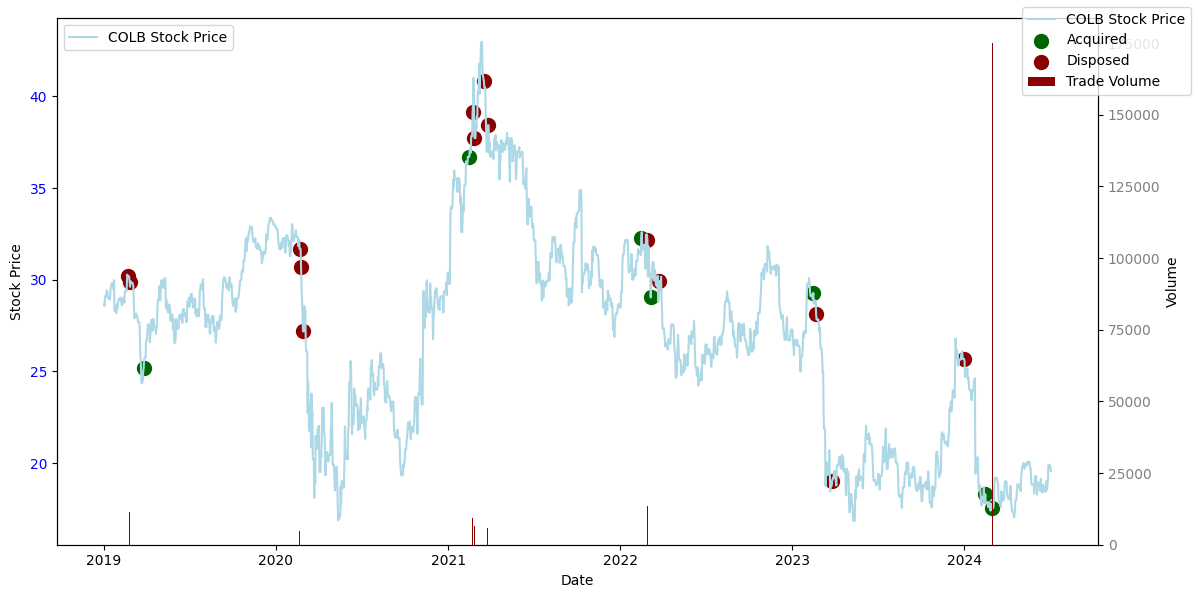

In [85]:
# Filter stock_data for 'COLB' ticker
colb_stock_data = stock_data[stock_data['ticker'] == 'COLB']

# Set the date as the index for stock_data
colb_stock_data.set_index('Date', inplace=True)

# Reindex to include all dates from min to max date
full_date_range = pd.date_range(start=colb_stock_data.index.min(), end=colb_stock_data.index.max())
colb_stock_data = colb_stock_data.reindex(full_date_range)

# Fill missing prices with last known price
colb_stock_data['Adj Close'].fillna(method='ffill', inplace=True)

colb_stock_data = colb_stock_data.reset_index().rename(columns = {'index' : 'Date'})

# Filter trades for 'Dow Lisa'
dow_lisa_trades = all_trades[all_trades['reportingPersonName'] == 'Dow Lisa']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the stock prices
ax1.plot(colb_stock_data['Date'], colb_stock_data['Adj Close'], color='lightblue', label='COLB Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Overlay the trades
acquired_trades = dow_lisa_trades[dow_lisa_trades['acquiredDisposed'] == 'A']
disposed_trades = dow_lisa_trades[dow_lisa_trades['acquiredDisposed'] == 'D']

ax1.scatter(acquired_trades['Date'], colb_stock_data.set_index('Date').loc[acquired_trades['Date']]['Adj Close'], color='darkgreen', label='Acquired', marker='o', s = 100)
ax1.scatter(disposed_trades['Date'], colb_stock_data.set_index('Date').loc[disposed_trades['Date']]['Adj Close'], color='darkred', label='Disposed', marker='o', s = 100)

# Create a secondary y-axis for the volume
ax2 = ax1.twinx()
ax2.bar(dow_lisa_trades['Date'], dow_lisa_trades['total'], color='darkred', alpha=1, label='Trade Volume')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y', labelcolor='grey')

# Show legends
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

It is clearly seen that Lisa Dow is timing the peaks and bottoms really well with her trades. Observe that all of her trades were up to 10.000 dollars in volume until the early 2024. when she bought 176.000 dollars of COLB shares! From then, COLB rose 18%!

Lets now do naive approach a develop a trading strategy which will consist of just copying trades of those top 50 performers in 2023.

We will keep it simple and assume every trade is entered with amount 100 and exited exactly one month later.

In [86]:
# Create a copy of filtered_trades DataFrame
filtered_trades_copy = filtered_trades.copy()

# Filtered trades after January 1, 2023
filtered_trades_copy = filtered_trades_copy[filtered_trades_copy['Date'] >= pd.to_datetime('2023-01-01')]
filtered_trades_copy = filtered_trades_copy[filtered_trades_copy['Date'] < pd.to_datetime('2024-01-01')]

# Initialize PnL column
filtered_trades_copy['PnL'] = 0.0

# Iterate through filtered_trades_copy
for index, row in filtered_trades_copy.iterrows():
    reporting_person = row['reportingPersonName']
    if reporting_person in top_names.index:
        # Calculate PnL based on acquiredDisposed
        if row['acquiredDisposed'] == 'A':  # Buy trade
            pnl = 100*(row['1m_price']/row['sharePrice']) - 100
        elif row['acquiredDisposed'] == 'D':  # Short trade
            pnl = 100 - 100*(row['1m_price']/row['sharePrice'])
        else:
            pnl = 0.0

        # Assign calculated PnL
        filtered_trades_copy.at[index, 'PnL'] = pnl

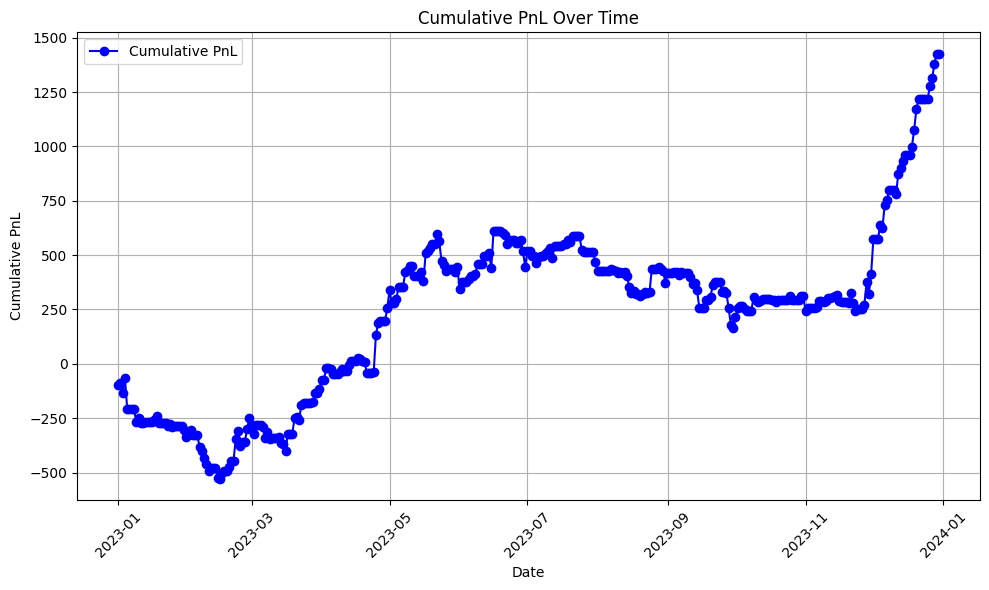

In [87]:
# Group by date and sum up PnL for each date
daily_pnl = filtered_trades_copy.groupby('Date')['PnL'].sum().reset_index()

# Calculate cumulative PnL
daily_pnl['Cumulative PnL'] = daily_pnl['PnL'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_pnl['Date'], daily_pnl['Cumulative PnL'], marker='o', linestyle='-', color='b', label='Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This doesnt look too shaby, but it would be worthy to look at buys and sells separately and try to identify the best performers for each. At the end we will choose one of those 3 strategies and dive a bit deeper into it.

## **Simple copy-trading on buys**

Top names by highest average 1m_z_score (clipped to -5 to 5):
reportingPersonName
ALBERT CONRAD P                   2.874255
WAGNER PATRICK                    2.700395
Smith Melissa D                   2.628441
Ahmed Nabeel                      2.363460
BONDI MICHAEL                     2.211737
WILLIAMS FRANK J                  2.062562
Elliott Jeffrey Thomas            2.004935
Wells George M.                   1.940685
Cheng Andrew                      1.795314
Yale Catriona                     1.795314
White William Richard             1.795314
KEETON SIMON                      1.725122
Jackson Benjamin                  1.713204
Dias Nelson                       1.700670
HANSEN MARKA                      1.695694
Kosiba John W JR                  1.671127
STORCH DAVID P                    1.648340
GROSSMAN D KEITH                  1.641112
Sinha Vikas                       1.639529
Brunick David                     1.628929
Neagle Matthew                    1.600073
Rasmussen Hans 

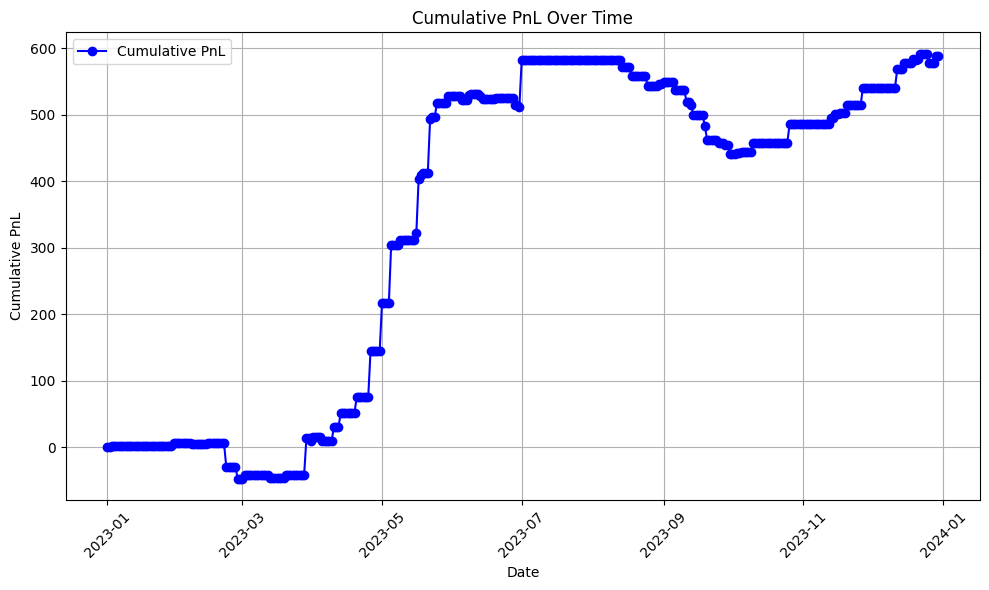

In [88]:
copy_trades = filtered_trades.copy()
no_performers = 100

# Keep only the specified columns
copy_trades = copy_trades[['Date', 'ticker', 'reportingPersonName', 'acquiredDisposed', '1m_z_score']]

# Convert 'Date' column to datetime format
copy_trades['Date'] = pd.to_datetime(copy_trades['Date'])

# Remove rows with reportingPersonName having less than 20 occurrences
name_counts = copy_trades['reportingPersonName'].value_counts()
copy_trades = copy_trades[copy_trades['reportingPersonName'].isin(name_counts[name_counts >= 20].index)].dropna()

# Filter only buys
copy_trades = copy_trades[copy_trades['acquiredDisposed'] == 'A']

# Clip '1m_z_score' values to range -5 to 5
copy_trades['1m_z_score'] = copy_trades['1m_z_score'].clip(lower=-5, upper=5)

# Calculate average 1m_z_score for each reportingPersonName
average_z_scores = copy_trades.query('Date < "2023-01-01"').groupby('reportingPersonName')['1m_z_score'].mean()

# Sort by average 1m_z_score in descending order
top_names_buys = average_z_scores.sort_values(ascending=False).head(no_performers)

# Display the top names with highest average 1m_z_score
print("Top names by highest average 1m_z_score (clipped to -5 to 5):")
print(top_names_buys.head(50))

# Create a copy of filtered_trades DataFrame
filtered_trades_copy_buys = filtered_trades.copy()

# Filtered trades after January 1, 2023
filtered_trades_copy_buys = filtered_trades_copy_buys[filtered_trades_copy_buys['Date'] >= pd.to_datetime('2023-01-01')]
filtered_trades_copy_buys = filtered_trades_copy_buys[filtered_trades_copy_buys['Date'] < pd.to_datetime('2024-01-01')]

# Initialize PnL column
filtered_trades_copy_buys['PnL'] = 0.0

# Iterate through filtered_trades_copy
for index, row in filtered_trades_copy_buys.iterrows():
    reporting_person = row['reportingPersonName']
    trans = row['acquiredDisposed']
    if reporting_person in top_names_buys.index and trans == 'A':
        # Calculate PnL based on acquiredDisposed
        if row['acquiredDisposed'] == 'A':  # Buy trade
            pnl = 100*(row['1m_price']/row['sharePrice']) - 100
        elif row['acquiredDisposed'] == 'D':  # Short trade
            pnl = 100 - 100*(row['1m_price']/row['sharePrice'])
        else:
            pnl = 0.0

        # Assign calculated PnL
        filtered_trades_copy_buys.at[index, 'PnL'] = pnl

# Group by date and sum up PnL for each date
daily_pnl_buys = filtered_trades_copy_buys.groupby('Date')['PnL'].sum().reset_index()

# Calculate cumulative PnL
daily_pnl_buys['Cumulative PnL'] = daily_pnl_buys['PnL'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_pnl_buys['Date'], daily_pnl_buys['Cumulative PnL'], marker='o', linestyle='-', color='b', label='Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## **Simple copy-trading on sells**

Top names by highest average 1m_z_score (clipped to -5 to 5):
reportingPersonName
Shoup Scot A                            1.892207
MARTIN RUBEN S                          1.892207
TAUSCHER RANDALL                        1.892207
BOOTH CHRIS H                           1.892207
BONDURANT ROBERT D                      1.892207
Taylor Douglas C                        1.595036
Cummins Wes                             1.541164
Boever Christopher J.                   1.533246
MATHER COURTNEY                         1.459175
SINGER KAREN                            1.301167
Kao James                               1.266566
Gibson Donald E                         1.236711
Clark Christopher                       1.210586
BEDINGFIELD ROBERT A                    1.202113
SLTA IV (GP), L.L.C.                    1.182890
Landesberg Stuart                       1.154089
WALLMAN RICHARD F                       1.127117
Moskovitz Dustin A.                     1.125712
Mhatre Nitin J.                     

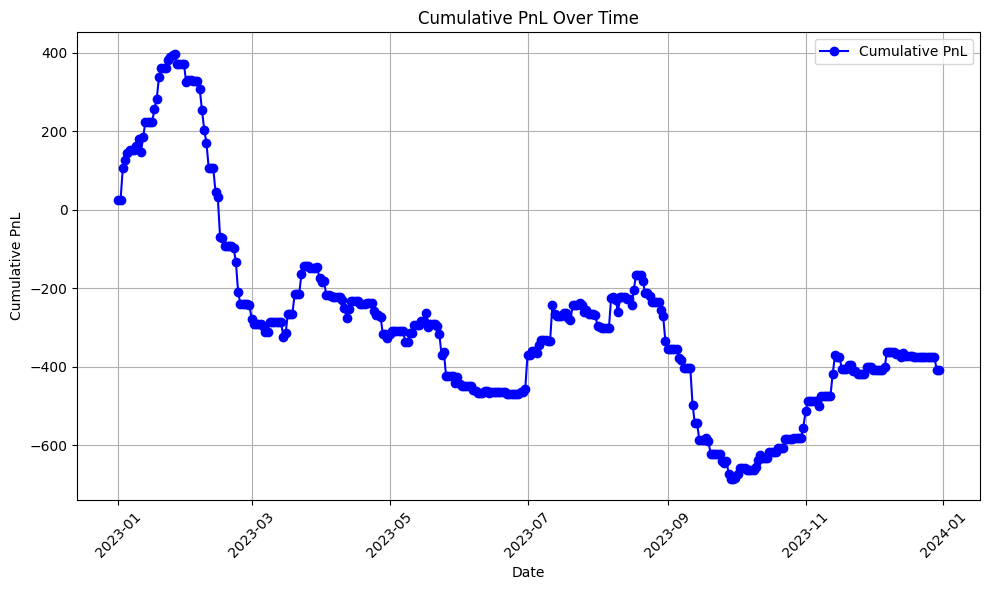

In [89]:
copy_trades = filtered_trades.copy()
no_performers = 100

# Keep only the specified columns
copy_trades = copy_trades[['Date', 'ticker', 'reportingPersonName', 'acquiredDisposed', '1m_z_score']]

# Convert 'Date' column to datetime format
copy_trades['Date'] = pd.to_datetime(copy_trades['Date'])

# Remove rows with reportingPersonName having less than 20 occurrences
name_counts = copy_trades['reportingPersonName'].value_counts()
copy_trades = copy_trades[copy_trades['reportingPersonName'].isin(name_counts[name_counts >= 20].index)].dropna()

# Filter only sells
copy_trades = copy_trades[copy_trades['acquiredDisposed'] == 'D']

# Clip '1m_z_score' values to range -5 to 5
copy_trades['1m_z_score'] = copy_trades['1m_z_score'].clip(lower=-5, upper=5)

# Calculate average 1m_z_score for each reportingPersonName
average_z_scores = copy_trades.query('Date < "2023-01-01"').groupby('reportingPersonName')['1m_z_score'].mean()

# Sort by average 1m_z_score in descending order
top_names_sells = average_z_scores.sort_values(ascending=False).head(no_performers)

# Display the top names with highest average 1m_z_score
print("Top names by highest average 1m_z_score (clipped to -5 to 5):")
print(top_names_sells.head(50))

# Create a copy of filtered_trades DataFrame
filtered_trades_copy_sells = filtered_trades.copy()

# Filtered trades after January 1, 2023
filtered_trades_copy_sells = filtered_trades_copy_sells[filtered_trades_copy_sells['Date'] >= pd.to_datetime('2023-01-01')]
filtered_trades_copy_sells = filtered_trades_copy_sells[filtered_trades_copy_sells['Date'] < pd.to_datetime('2024-01-01')]

# Initialize PnL column
filtered_trades_copy_sells['PnL'] = 0.0

# Iterate through filtered_trades_copy
for index, row in filtered_trades_copy_sells.iterrows():
    reporting_person = row['reportingPersonName']
    trans = row['acquiredDisposed']
    if reporting_person in top_names_sells.index and trans == 'A':
        # Calculate PnL based on acquiredDisposed
        if row['acquiredDisposed'] == 'A':  # Buy trade
            pnl = 100*(row['1m_price']/row['sharePrice']) - 100
        elif row['acquiredDisposed'] == 'D':  # Short trade
            pnl = 100 - 100*(row['1m_price']/row['sharePrice'])
        else:
            pnl = 0.0

        # Assign calculated PnL
        filtered_trades_copy_sells.at[index, 'PnL'] = pnl

# Group by date and sum up PnL for each date
daily_pnl_sells = filtered_trades_copy_sells.groupby('Date')['PnL'].sum().reset_index()

# Calculate cumulative PnL
daily_pnl_sells['Cumulative PnL'] = daily_pnl_sells['PnL'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_pnl_sells['Date'], daily_pnl_sells['Cumulative PnL'], marker='o', linestyle='-', color='b', label='Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Lets take initial strategy that consist of both buys and sells for top 100 performers and analyse it a bit more.

# **Analysis of chosen strategy**

In [90]:
# in filtered_trades_copy you have column PnL for trades that were followed
# we can start with number of trades done, number of sells, number of buys, total PnL, PnL per trade = ROI per trade (thats for 1 month)
# then annualize that ROI, average number of trades per month or something like that to see how many capital was in the trades at all times
# names of the persons who performed the best and worst etc...
# Alpha, beta, arithmeticand geometric mean return, Sharpe and Sortino ratios, compound annual growth rate, maximum drawdown, volatility

Among three strategies, we chose the strategy that uses both buys and sells

In [91]:
copy_trades = filtered_trades.copy()
no_persons = 100

# Keep only the specified columns
copy_trades = copy_trades[['Date', 'ticker', 'reportingPersonName', 'acquiredDisposed', '1m_z_score']]

# Convert 'Date' column to datetime format
copy_trades['Date'] = pd.to_datetime(copy_trades['Date'])

# Remove rows with reportingPersonName having less than 20 occurrences
name_counts = copy_trades['reportingPersonName'].value_counts()
copy_trades = copy_trades[copy_trades['reportingPersonName'].isin(name_counts[name_counts >= 20].index)].dropna()

# Clip '1m_z_score' values to range -5 to 5
copy_trades['1m_z_score'] = copy_trades['1m_z_score'].clip(lower=-5, upper=5)

# Calculate average 1m_z_score for each reportingPersonName
average_z_scores_final = copy_trades[(copy_trades['Date']<'20230101')].groupby('reportingPersonName')['1m_z_score'].mean()

# Sort by average 1m_z_score in descending order
top_names_final = average_z_scores_final.sort_values(ascending=False).head(no_persons)

# Display the top 100 reportingPersonName with highest average 1m_z_score
print("Top names by highest average 1m_z_score (clipped to -5 to 5):")
print(top_names_final.head(10))

Top names by highest average 1m_z_score (clipped to -5 to 5):
reportingPersonName
Corre Partners Management, LLC    1.352651
Wool Kyle Michael                 1.271735
Stedham Adam H                    1.260296
Clark Christopher                 1.210586
SLTA IV (GP), L.L.C.              1.182890
DAHL JAMES H                      1.011144
Terem Shai                        1.008306
Buller Benyamin                   0.972071
GELLER MARSHALL S                 0.959599
Mendelson Daniel Newman           0.956569
Name: 1m_z_score, dtype: float64


In [92]:
filtered_trades.sample()

,Date,ticker,reportingPersonName,acquiredDisposed,sharePrice,total,sector,7d_price,7d_z_score,1m_price,1m_z_score,3m_price,3m_z_score,6m_price,6m_z_score,director,officer,tp_owner,other,officer_title
258854,2022-02-24,NEM,Gottesfeld Stephen P,D,60.747601,1692224,Basic Materials,64.353134,-0.932928,72.163597,-1.417051,61.992199,-0.089195,40.449178,1.028628,False,True,False,False,EVP and Chief S&EA Officer


In [93]:
filtered_trades_copy2 = filtered_trades[(filtered_trades['Date']>'20230101')&(filtered_trades['Date']<='20231231')].copy()
buy_test_set = 0
sell_test_set = 0
no_trade_test_set = 0
for index, row in filtered_trades_copy2.iterrows():
    reporting_person2 = row['reportingPersonName']
    if reporting_person2 in top_names_final.index:
        # Calculate PnL based on acquiredDisposed
        if row['acquiredDisposed'] == 'A':  # Buy trade
            pnl = 100*(row['1m_price']/row['sharePrice']) - 100
            buy_test_set+=1
        elif row['acquiredDisposed'] == 'D':  # Short trade
            pnl = 100 - 100*(row['1m_price']/row['sharePrice'])
            sell_test_set+=1
        else:
            pnl = 0.0
            no_trade_test_set+=1
        #print(f'PnL: {pnl}\nReporting perons:{reporting_person2}')
        # Assign calculated PnL
        filtered_trades_copy2.at[index, 'PnL'] = pnl

In [94]:
total_trades = buy_test_set + sell_test_set+no_trade_test_set
print(f'buy trades: {buy_test_set}\nsell trades: {sell_test_set}\nno_trade_test_set:{no_trade_test_set}\ntotal trades: {total_trades}')

buy trades: 528
sell trades: 383
no_trade_test_set:0
total trades: 911


In [95]:
trade_made = filtered_trades_copy2[~filtered_trades_copy2['PnL'].isna()]
print(f'total insider trades: {len(filtered_trades_copy2)}\ntotal insider trades that made by copy-trading: {len(trade_made)}')

total insider trades: 91575
total insider trades that made by copy-trading: 911


In [96]:
# To put that trade has been made or not
filtered_trades_copy2['trade_YN'] = ~filtered_trades_copy2['PnL'].isna()

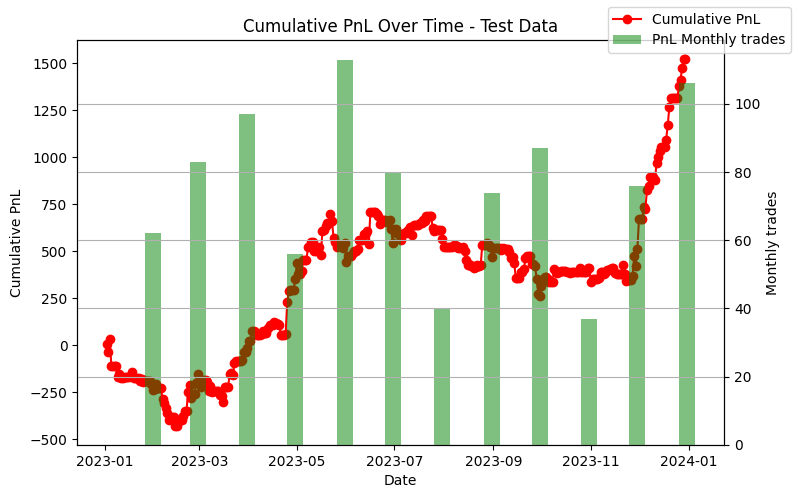

In [97]:
# Group by date and sum up PnL for each date
daily_pnl2 = filtered_trades_copy2.groupby('Date')['PnL'].sum().reset_index()

# Calculate cumulative PnL
daily_pnl2['Cumulative PnL'] = daily_pnl2['PnL'].cumsum()

# Count how many trades that made per each day
daily_pnl2['num_trade_per_day'] = list(filtered_trades_copy2.groupby('Date').trade_YN.sum())

daily_pnl2_monthly_trades = daily_pnl2.set_index('Date')
daily_pnl2_monthly_trades = daily_pnl2_monthly_trades.resample('M').sum()

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(daily_pnl2['Date'], daily_pnl2['Cumulative PnL'], marker='o', linestyle='-', color='r', label='Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')

# Create a second y-axis for the daily volumes
ax2 = ax1.twinx()

# Plotting the acquired and disposed monthly volumes as bar plots
width = 10  # Width of the bars

ax2.bar(daily_pnl2_monthly_trades.index, daily_pnl2_monthly_trades.num_trade_per_day, width=width, label='PnL Monthly trades', color='g', alpha=0.5)
ax2.set_ylabel('Monthly trades', color='k')
ax2.tick_params(axis='y', labelcolor='k')

plt.title('Cumulative PnL Over Time - Test Data')
plt.xticks(rotation=45)
plt.grid(True)

fig.legend()
plt.tight_layout()
plt.show()

In [98]:
pnl_per_trade = daily_pnl2.PnL.sum()/total_trades
print(f'total PnL: {daily_pnl2.PnL.sum()}\nPnL per Trade: {pnl_per_trade}')

total PnL: 1525.036319609762
PnL per Trade: 1.674024500120485


In [99]:
# Assuming the trades are within one year for simplicity in annualizing ROI
annualized_roi = ((1 + pnl_per_trade/100) ** 12 - 1)*100
print(f"Average annualized ROI for each trade: {annualized_roi}")

# Average number of trades per month
average_trades_per_month = total_trades / 12
print(f"Average number of trades per month: {average_trades_per_month}\n")

# Best and worst performers
best_performer = filtered_trades_copy2.groupby('reportingPersonName')['PnL'].sum().idxmax()
worst_performer = filtered_trades_copy2.groupby('reportingPersonName')['PnL'].sum().idxmin()

# Add how many different people we followed
print(f'Number of insiders: {filtered_trades_copy2.reportingPersonName.nunique()}')
print(f"Best performer: {best_performer} with PnL:{filtered_trades_copy2.groupby('reportingPersonName')['PnL'].sum().sort_values(ascending=False)[0]}") # Add how much money he made
print(f"Worst performer: {worst_performer} with PnL: {filtered_trades_copy2.groupby('reportingPersonName')['PnL'].sum().sort_values(ascending=False)[-1]}") # Add how much money he lost

Average annualized ROI for each trade: 22.04505057336481
Average number of trades per month: 75.91666666666667

Number of insiders: 29137
Best performer: Buller Benyamin with PnL:462.67976705842176
Worst performer: AULT MILTON C III with PnL: -588.265534975696


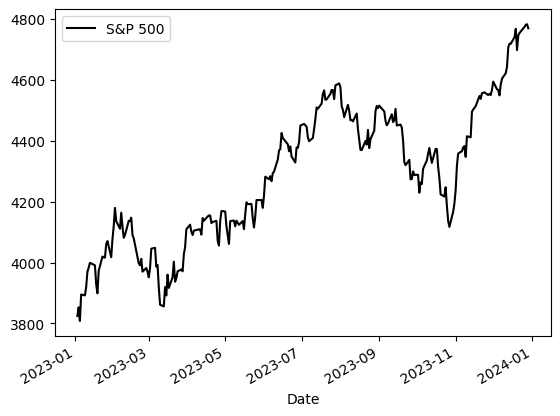

In [100]:
benchmark = sp500[(sp500.index >'20230101')&(sp500.index <='20231231')].Close
benchmark.plot(label='S&P 500', c='black',legend=True)
plt.show()

In [101]:
# Returns calculation
returns_final = pd.merge(daily_pnl2,benchmark.reset_index(),how='inner')

Based on the information about average and maximum trades a month, we wil assume we need about 10000 of capital which equals the amount needed to open 100 trades and hold them for a month. We will use this value of 10000 as our initial investment.

In [102]:
returns_final['Cumulative balance'] = returns_final['Cumulative PnL'] + 10000
returns_final['pct_ret_strategy'] = returns_final['Cumulative balance'].pct_change()
returns_final['pct_ret_benchmark'] = returns_final['Close'].pct_change()

In [103]:
# Returns calculation
returns_final = returns_final.dropna()

# Alpha and Beta
cov_matrix = np.cov(returns_final['pct_ret_strategy'], returns_final['pct_ret_benchmark'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]
alpha = returns_final['pct_ret_strategy'].mean() - beta * returns_final['pct_ret_benchmark'].mean()

# Arithmetic mean return
arithmetic_mean_return = returns_final['pct_ret_strategy'].mean()
arithmetic_mean_per_trade_return = filtered_trades_copy2[~filtered_trades_copy2['PnL'].isna()]['PnL'].mean()

# Sharpe ratio
risk_free_rate = 0.042  # US 10 year treasury yield
trades_base_PnL = filtered_trades_copy2[~filtered_trades_copy2['PnL'].isna()]['PnL'] # To calculate Sharpe Ratio, follow the each trade that was made
sharpe_ratio = (trades_base_PnL.mean()-risk_free_rate)/trades_base_PnL.std()

# Sortino ratio
negative_returns = trades_base_PnL[trades_base_PnL < 0]
downside_deviation = np.std(negative_returns)
sortino_ratio = (trades_base_PnL.mean() - risk_free_rate) / downside_deviation

# Maximum drawdown
cumulative_returns = (1 + returns_final['pct_ret_strategy']).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

# Volatility
daily_volatility = returns_final['pct_ret_strategy'].std()
per_trade_volatility = filtered_trades_copy2[~filtered_trades_copy2['PnL'].isna()]['PnL'].std()

# Print results
print(f"Alpha: {round(alpha, 5)}")
print(f"Beta: {round(beta, 5)}")
print(f"Arithmetic mean daily return: {round(arithmetic_mean_return*100, 2)}%")
print(f"Arithmetic mean per trade return: {round(arithmetic_mean_per_trade_return, 2)}%")
print(f"Sharpe ratio: {sharpe_ratio:.2f}")
print(f"Sortino ratio: {sortino_ratio:.2f}")
print(f"Maximum drawdown: {round(max_drawdown*100)}%")
print(f"Per trade volatility: {round(per_trade_volatility, 2)}%")
print(f"Daily volatility: {round(daily_volatility, 4)}%")


Alpha: 0.00057
Beta: 0.02556
Arithmetic mean daily return: 0.06%
Arithmetic mean per trade return: 1.67%
Sharpe ratio: 0.08
Sortino ratio: 0.12
Maximum drawdown: -5%
Per trade volatility: 20.43%
Daily volatility: 0.0042%


Even though the strategy didnt show significant edge over overall market in 2023, the almost 0 Beta value suggests the strategy returns are uncorrelated with overall market returns. Achieving such market neutrality is always a positive characteristic of a trading strategy as it brings diversification to portofolio and opportunity to hedge against systematic risk. On the other hand, maximum drawdown of only 5% shows desirable level of risk management for the strategy.

# Conclusion

To conclude, dataset generated with sec-api provides infinitely many opportunities to describe, analyse and even create a trading strategy using all the available information in it. Creating even a simplest copy-trading strategy like this already brings some benefits that are desirable in stock trading and portfolio management. On the other hand, this datase, especially when enriched with additional information like earnings reports and similar, provides more than enough information to detect and identify potential illegal inside trading.
For further reserach on this topic we would suggest using advanced machine learning algorithms to identify the best insider trades to follow with the aim of creating market neutral strategy that consistently beats overall market movements.